# **Competition Kaggle: Titanic - Machine Learning from Disaster**
 link:https://www.kaggle.com/competitions/titanic

In this notebook, a solution will be proposed for the Kaggle competition: Titanic - Machine Learning from Disaster, simulating the CRISP-DM methodology for this context

# **STEP 1 - BUSINEES UNDERSTANDING**

The Titanic's sinking, one of history's most infamous shipwrecks, occurred on April 15, 1912, during its maiden voyage, resulting in 1502 deaths out of 2224 passengers and crew due to insufficient lifeboats.

This challenge involves building a predictive model to determine which types of people were more likely to survive, using passenger data such as name, age, gender, and socio-economic class.

**The competition provides two datasets:**
*   train.csv: Contains information on 891 passengers, including survival status.
*   test.csv: Contains similar information for 418 passengers, without revealing their survival status.

The task is to use patterns from the train.csv data to predict survival outcomes for passengers in test.csv. After building the model, it can be submitted to Kaggle to compare its performance against others on the leaderboard.

**Submission Requirements:**
Submit a CSV file with exactly 418 entries plus a header row.
The file should contain exactly 2 columns:
*   PassengerId: Sorted in any order.
*   Survived: Contains your binary predictions (1 for survived, 0 for deceased).

**Metric:**
*   The score is the percentage of correctly predicted passengers, measured by accuracy.

**Goal:**
*   Predict if a passenger survived the sinking of the Titanic for each entry in the test set.
*  Aim for an accuracy of 90% in your predictions.


# **STEP 2 - DATA UNDERSTANDING**

*  **Initial Data Load**: Collecting and consolidating raw data.

*  **Exploratory Data Analysis (EDA)**: Using summary statistics, visualization tools, to uncover patterns or anomalies.

*  **Quality Assessment**: Identifying missing, inconsistent, or erroneous data that might affect the analysis.

* **Understanding Structure**: Comprehending the formats, types of variables, and relationships within the data.







**<h2>Initial Data Load</h2>**

**Pandas doc:** https://pandas.pydata.org/docs/index.html

**Numpy doc:** https://numpy.org/devdocs/

In [ ]:
#importing pandas
import pandas as pd

#importing numpy
import numpy as np

In [ ]:
#reading and vizualizing the train database
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#cheking train database information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#reading and vizualizing the test database
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#cheking train database information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


At first glance at the training dataset, we observe 12 columns and a total of 891 entries. Among the variables present in the columns, we have:

*   Survived: This is the target variable of the problem, meaning the one we want to predict. It has values of 1 for survival and 0 for death.
*   Pclass: Represents the class of the passenger's ticket, divided into 1st, 2nd, and 3rd classes.
*   Name: Name of the passenger.
*   Sex: Gender of the passenger.
*   Age: Age of the passenger in years.
*   SibSp: Number of siblings/spouses aboard the Titanic.
*   Parch: Number of parents/children aboard the Titanic.
*   Ticket: Ticket number, serving as an identifier.
*   Fare: Fare the passenger paid.
*   Cabin: Cabin number of the passenger.
*   Embarked: Port of embarkation, with C = Cherbourg, Q = Queenstown, and S = Southampton.

In this initial overview, it is also possible to observe some variables with null and textual values in the training dataset. This will be examined in more detail and addressed later.


**<h2>Exploratory Data Analysis (EDA)</h2>**

**Checking the distribution of variables**

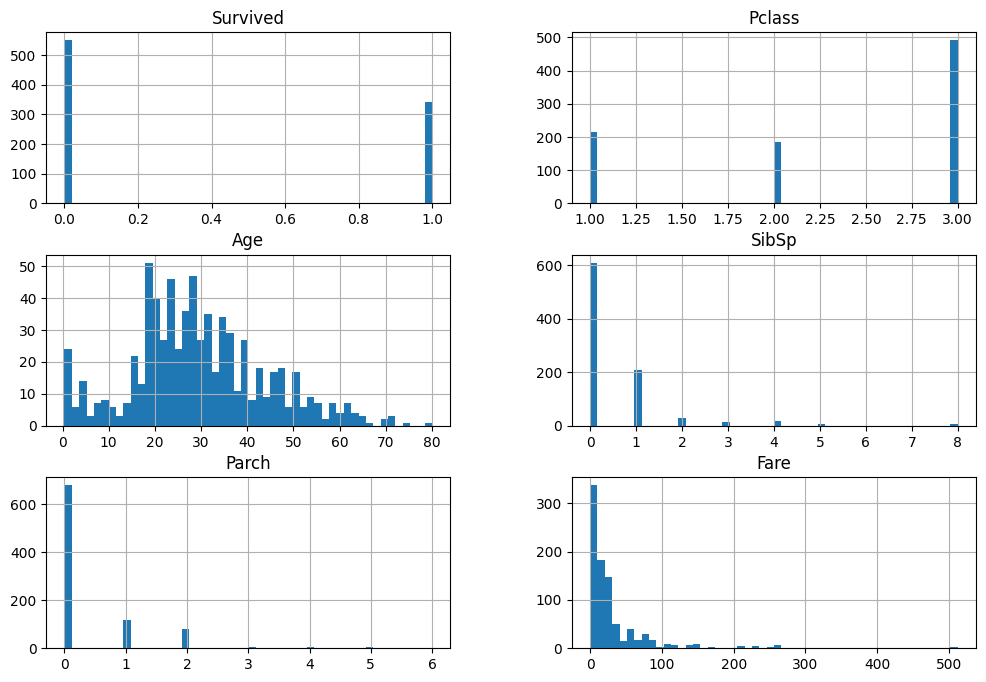

In [ ]:
train.drop(columns=["PassengerId"]).hist(bins=50, figsize=(12, 8))
plt.show()

**Question: How many passengers survivived?**

In [ ]:
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
train['Survived'].value_counts(normalize = True)*100

,proportion
Survived,
0,61.616162
1,38.383838


As expected the majority of passengers in the training data died and only 38% survived. This means that the training data suffers from data imbalance but it is not severe which is why I will not consider techniques like sampling to tackle the imbalance.

**Checking the distribution of some categorical variables**

**seaborn docc:** https://seaborn.pydata.org/

**matplotlibdoc:** https://matplotlib.org/

In [ ]:
#importing seaborn
import seaborn as sns

#importing matplotlib
import matplotlib.pyplot as plt

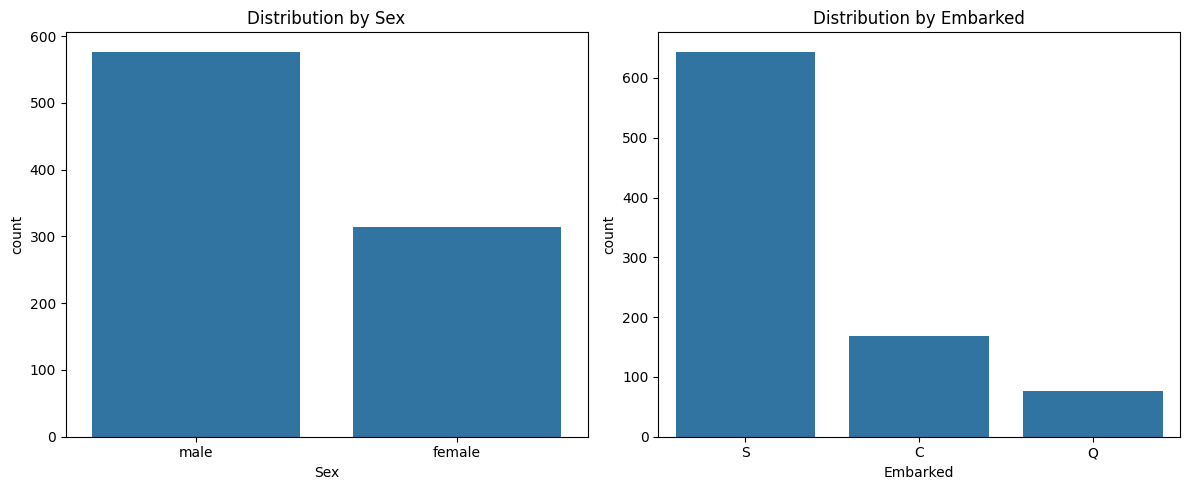

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First plot: sns.countplot for 'Sex'
sns.countplot(x='Sex', data=train, ax=axes[0])
axes[0].set_title('Distribution by Sex')

# Second plot: sns.countplot for 'Embarked'
sns.countplot(x='Embarked', data=train, ax=axes[1])
axes[1].set_title('Distribution by Embarked')

# Adjust spacing between the plots
plt.tight_layout()

# Display the plots
plt.show()

The first bar chart reveals a significant gender disparity among the passengers, with the majority being male. Meanwhile, the embarkation port chart shows a predominance of passengers boarding in Southampton.

**using a pie chart to visualize proportions**

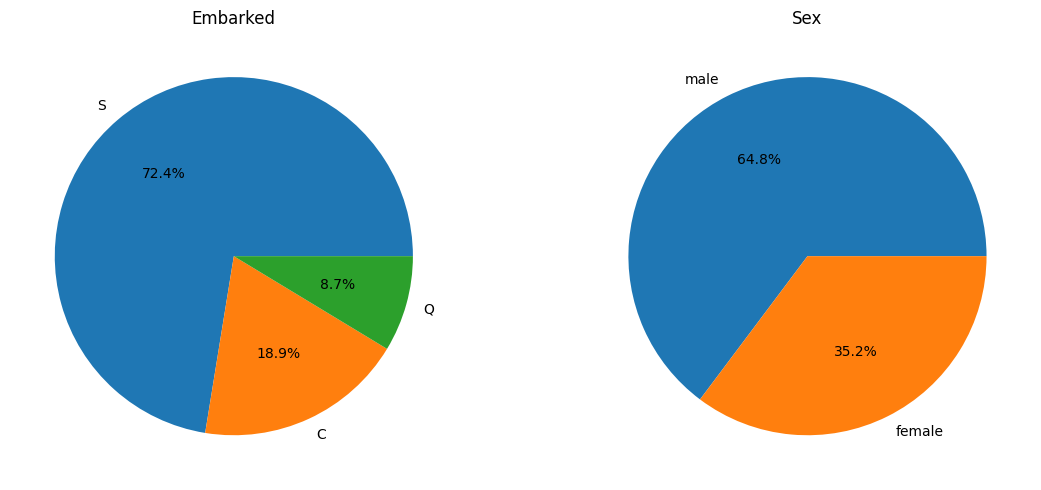

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First plot
axes[0].pie(train['Embarked'].value_counts(normalize=True), labels = train['Embarked'].value_counts().index, autopct='%1.1f%%')
axes[0].set_title('Embarked')

# Second plot
axes[1].pie(train['Sex'].value_counts(normalize=True), labels = train['Sex'].value_counts().index, autopct='%1.1f%%')
axes[1].set_title('Sex')

# Adjust spacing between the plots
plt.tight_layout()

# Display the plots
plt.show()

**visualizing descriptive statistics**

In [ ]:
train.drop(columns = ['PassengerId', 'Survived']).describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200



**checking for missing values**

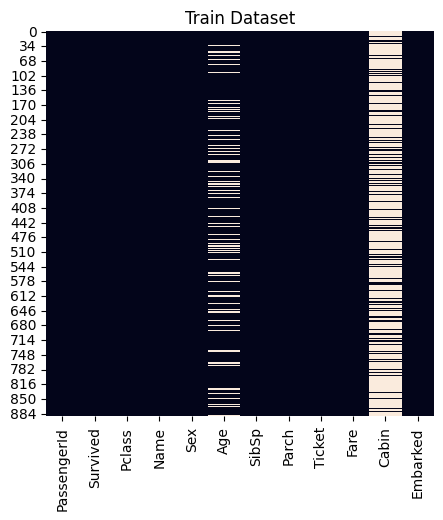

In [ ]:
def plot_missing_data(dataset, title):
  fig,ax = plt.subplots(figsize=(5,5))
  plt.title(title)
  sns.heatmap(dataset.isnull(), cbar=False)

plot_missing_data(train, 'Train Dataset')

In [ ]:
train.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


**checking the cardinality of features**

In [ ]:
train.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
(train.isnull()).mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


Looking more closely at each of the variables, some points stand out:

The **Name** variable has all unique values, making it impractical for classification models to find relevant patterns to solve the problem. Logically, it's also intuitive to conclude that a passenger's name does not affect their chances of survival. So, should the Name variable be discarded? Not necessarily! Some words like "Mr.", "Mrs.", and "Miss." appear with some frequency and might be useful for the model.

**Age** has 19.9% of its values missing.<br>The standard deviation of 14.526 indicates relatively high variability, meaning that, on average, ages vary by 14.526 years from the mean of 29.699.<br> Despite this high standard deviation, most passengers are relatively close to the mean.

**SibSp** has 68.2% of its values equal to 0.

**Parch** has 76.1% of its values equal to 0.

Similar to Name, **Ticket** has a very high proportion of unique values (76.4%). However, patterns in its characters might still be evaluated later.

**Fare** shows high skewness in its data, indicating the presence of outliers. Additionally, it has many values recorded as 0.0, which may suggest erroneous data entries or free tickets.

**Cabin** The 'Cabin' feature is similar to 'Name' and 'Ticket'
in terms of having a high number of unique values, but has many missing values.

**Embarked** has only two missing values, with 72.3% of its values being "S".

64.8% of the passengers are male.

**Additionally, we can quickly verify this information and obtain further insights using ydata_profiling.**

**ydata_profiling doc**: https://docs.profiling.ydata.ai/latest/advanced_settings/available_settings/

In [ ]:
#installing ydata-profiling
!pip install pandas ydata-profiling

#importing ydata profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e6440b079084dd927f1f2ede0286998567ec9518bd9b64b633b551ee6fbf69f2
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
#train dataset report
profile_train = ProfileReport(train, title="Titanic Train", explorative=True)

#Exporting report to notebook
profile_train.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

**Question: How is the distribution of the continuous variables?**

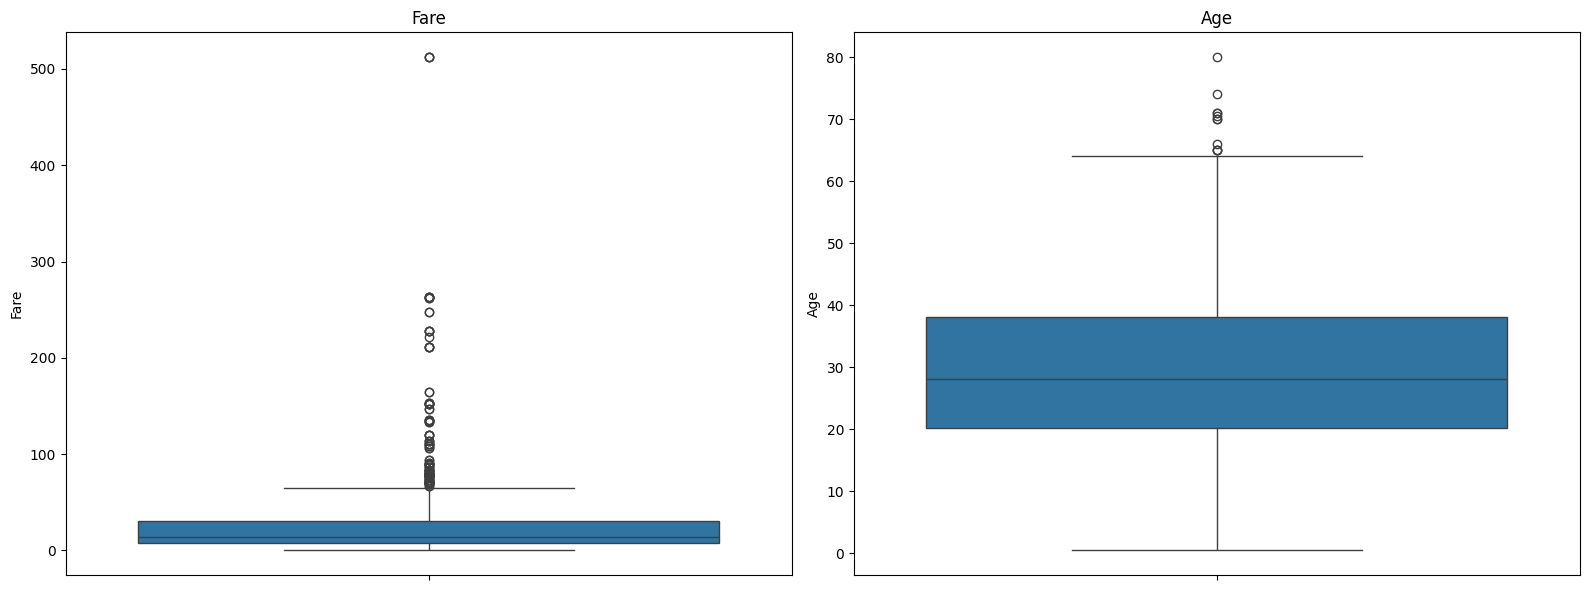

In [ ]:
#viewing boxplot of variables
def plot_numerical_boxplots(df):
    """
    This function takes a DataFrame as input and creates side-by-side boxplots for all numerical variables,
    with each plot maintaining its own scale.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    """
    # Select only the numerical columns from the DataFrame
    numerical_columns = df.select_dtypes(include='number').columns

    # Create subplots with one boxplot for each numerical variable
    fig, axes = plt.subplots(1, len(numerical_columns), figsize=(16, 6))

    # Create a boxplot for each numerical variable
    for i, column in enumerate(numerical_columns):
        sns.boxplot(y=df[column], ax=axes[i])
        axes[i].set_title(column)

    # Adjust the layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_numerical_boxplots(train[['Fare','Age']])

Observing the boxplots for the 'Age' and 'Fare' variables, the asymmetric distribution of 'Fare' stands out. The box is very narrow, with the median positioned towards the lower end, indicating that the vast majority of passengers paid amounts below $50. However, there are some extremely high values, with the highest value being more than double the second highest. In contrast, the 'Age' variable exhibits a much more symmetric distribution, despite a few outliers.

In [ ]:
#Function to Plot Bar Plots with Counts and Means
def plot_catfeature_catlabel_comparison(df, feature_x, feature_y, hue=None):
    """
    This function creates side-by-side plots to compare the count and survival rate of passengers based on their sex.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.
    """
    if(hue == None):
      hue_count = feature_y
    else:
      hue_count = hue

    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # First plot: sns.countplot for 'Sex', with 'Survived' as hue
    sns.countplot(data=df, x=feature_x, hue=hue_count, ax=axes[0])
    axes[0].set_title(f'Count of {feature_x} by {hue}')  # Set the title for the first plot

    # Second plot: sns.barplot for 'Sex' vs 'Survived'
    sns.barplot(data=df, x=feature_x, y=feature_y,hue=hue, ax=axes[1])
    axes[1].set_title(f'{feature_y} Rate by {feature_x}')  # Set the title for the second plot

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

In the competition, a dataset named gender_submission is provided. This dataset makes predictions by assuming all women are survivors and all men are non-survivors. Using this approach, the accuracy is 0.76555, indicating a strong correlation between the 'Sex' variable and the 'Survived' variable. This result can also serve as a baseline for the proposed model, as it is expected that the model should achieve a significantly higher accuracy compared to this simple logic.

**Evaluating the Impact of Gender on Survival Chances**

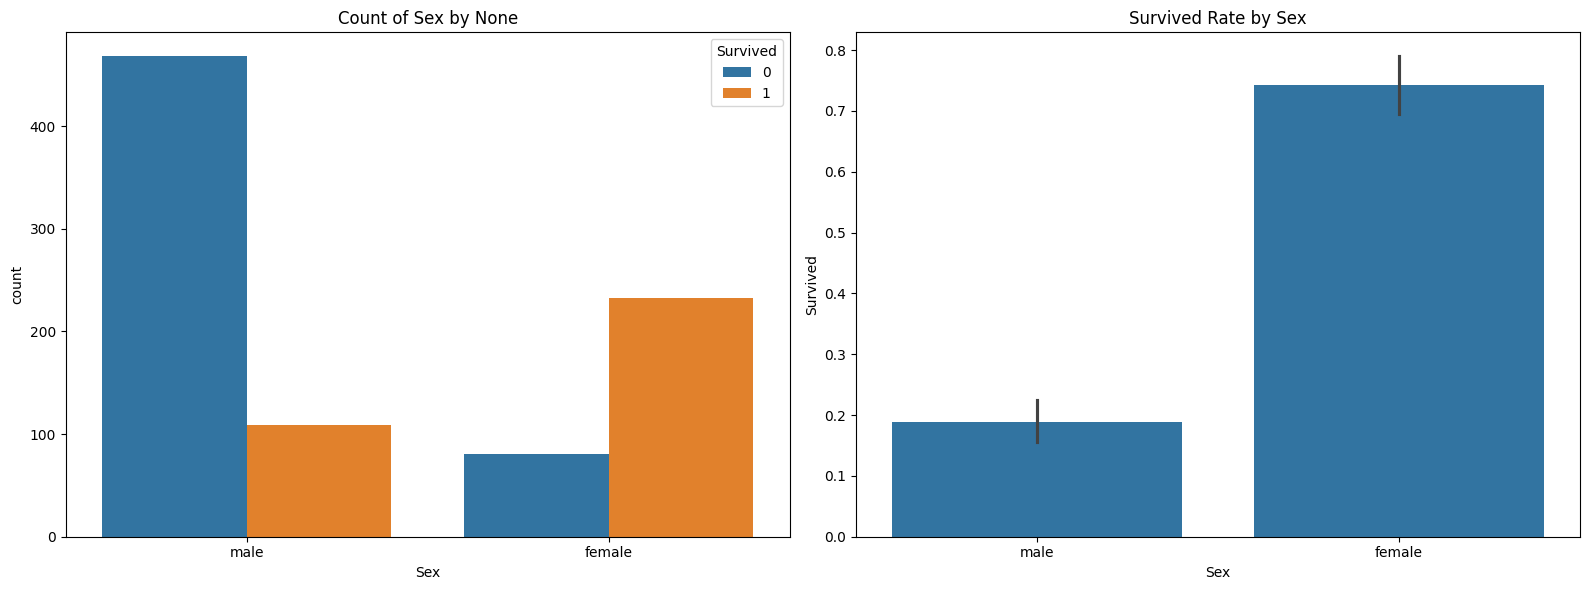

In [ ]:
plot_catfeature_catlabel_comparison(train, 'Sex', 'Survived')

In [ ]:
train.groupby('Sex')['Survived'].value_counts(normalize= True).unstack()

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


Despite having a significantly higher number of men on board, as observed in earlier distributions, the proportion of women who survived is notably greater. Specifically, 74.20% of women survived compared to only 18.89% of men.

**Question: What is the impact of 'Pclass' on survival chances?**

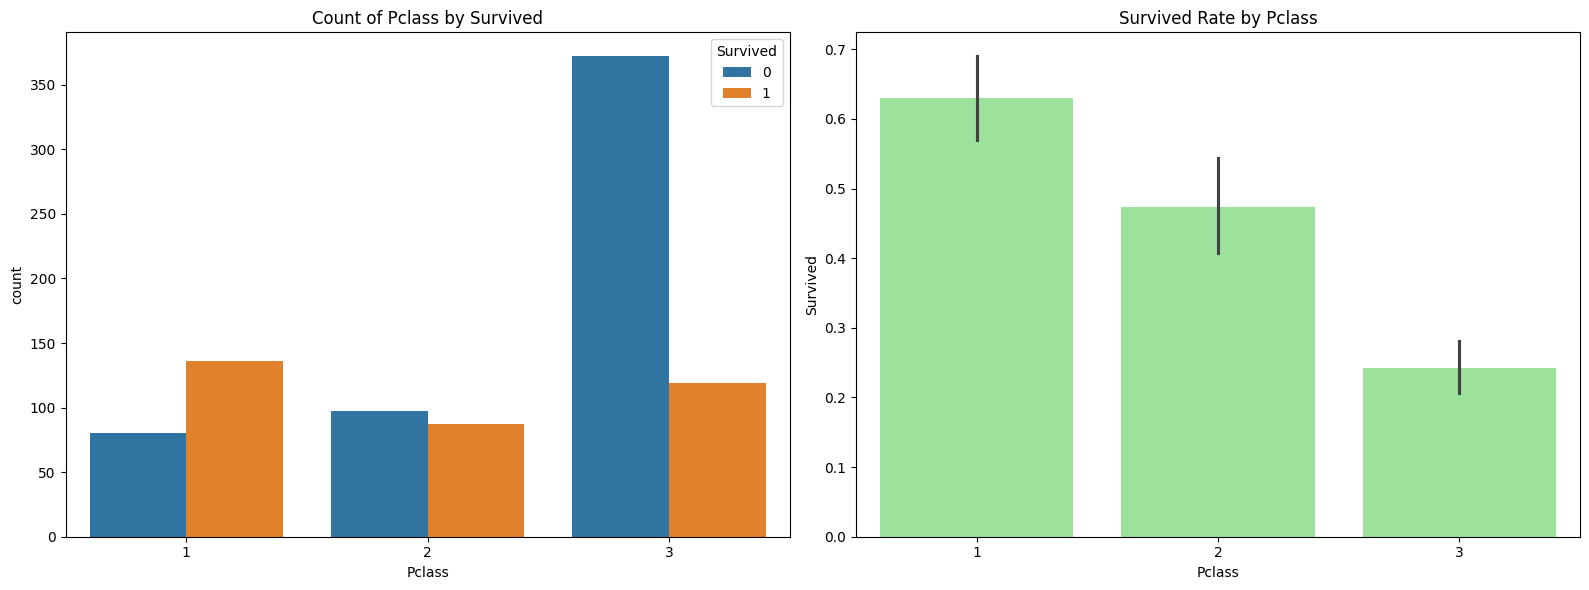

In [ ]:
 plot_catfeature_catlabel_comparison(train, 'Pclass', 'Survived')

As expected, first-class passengers have the highest survival chances, followed by second-class passengers, with third-class passengers having the lowest survival rates.

**Question: What is the relationship between family size and survival chances?**

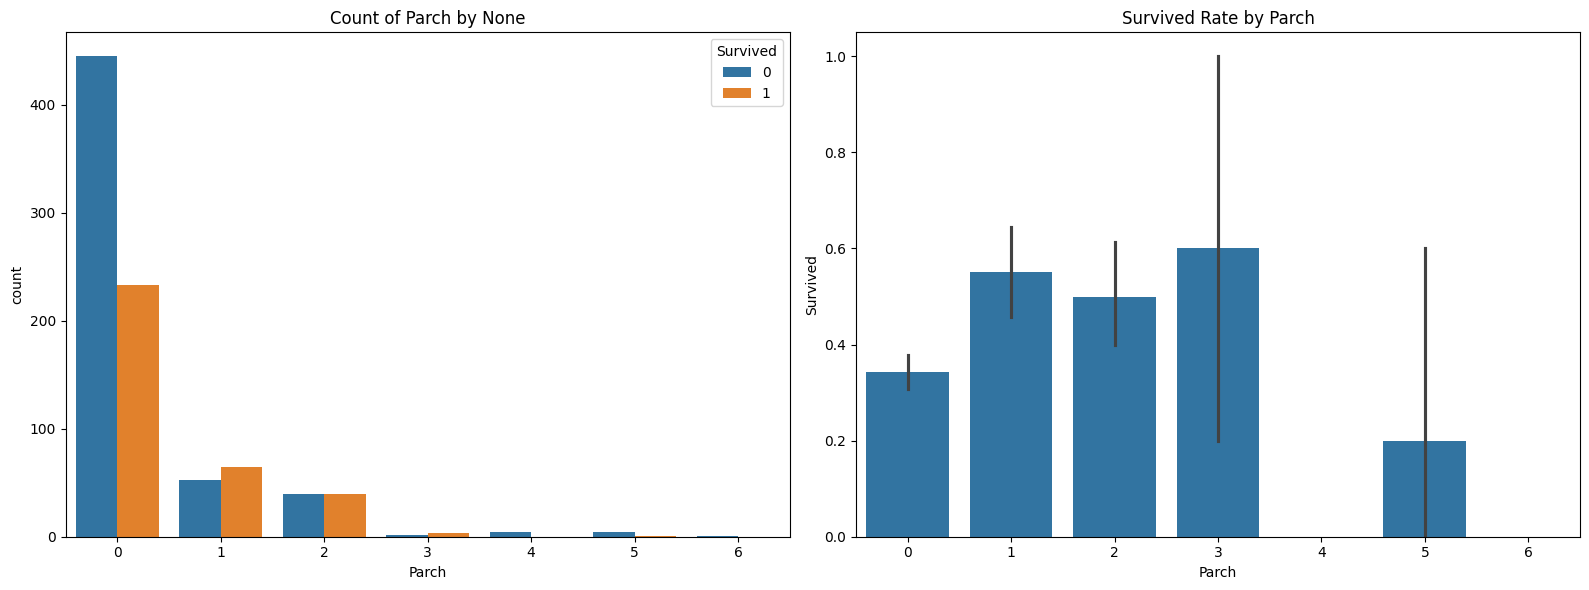

In [ ]:
plot_catfeature_catlabel_comparison(train, 'Parch', 'Survived')

There is no clear pattern for the 'Parch' feature. However, one notable observation is that passengers accompanied by 1 to 3 parents or children have a survival rate greater than 50%, meaning they are more likely to survive. This trend does not hold for passengers with 0 or more than 3 parents or children.

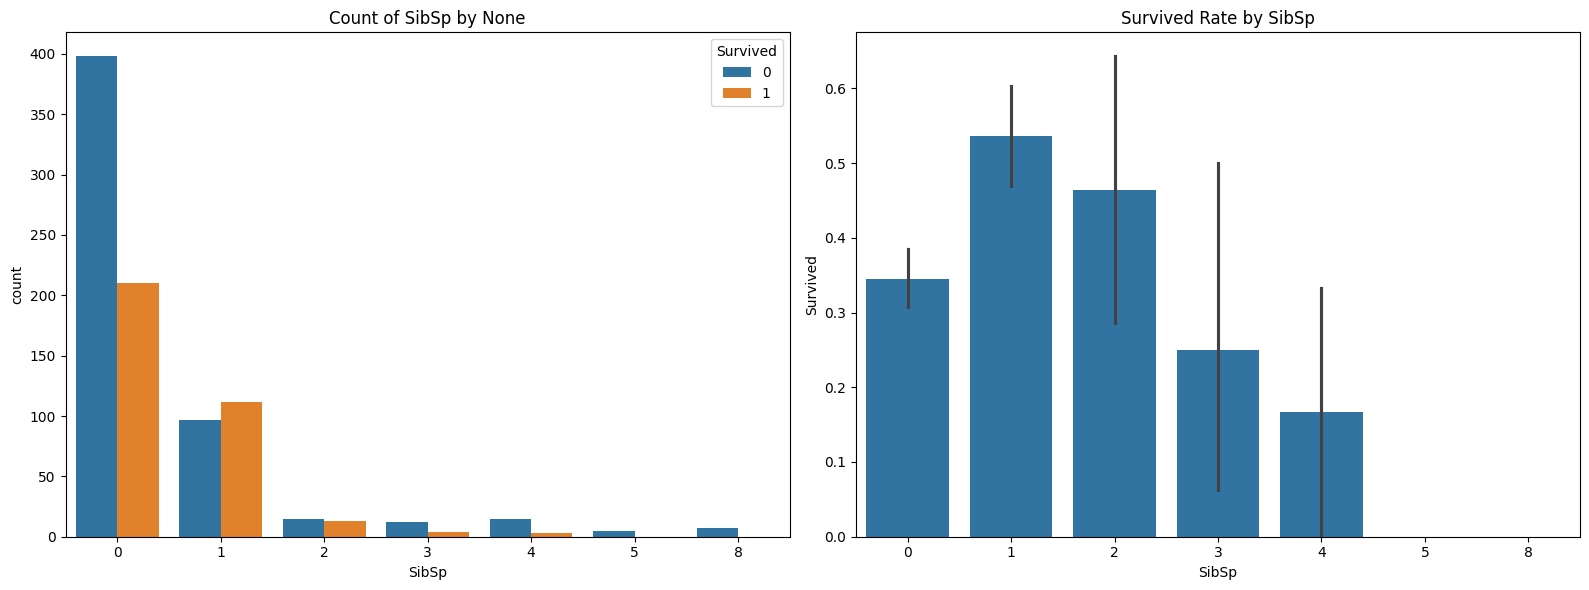

In [ ]:
plot_catfeature_catlabel_comparison(train, 'SibSp', 'Survived')

Similar to 'Parch', the 'SibSp' feature also shows a lower survival rate for passengers traveling alone or with many family members.

**Question: By summing the values of 'Parch' and 'SibSp' to obtain the total number of family members accompanying each passenger, is it possible to identify more conclusive patterns?**

In [ ]:
def family_size(X):
  X  = X.copy()
  X['family_size'] =  X['SibSp'] + X['Parch'] + 1
  return X

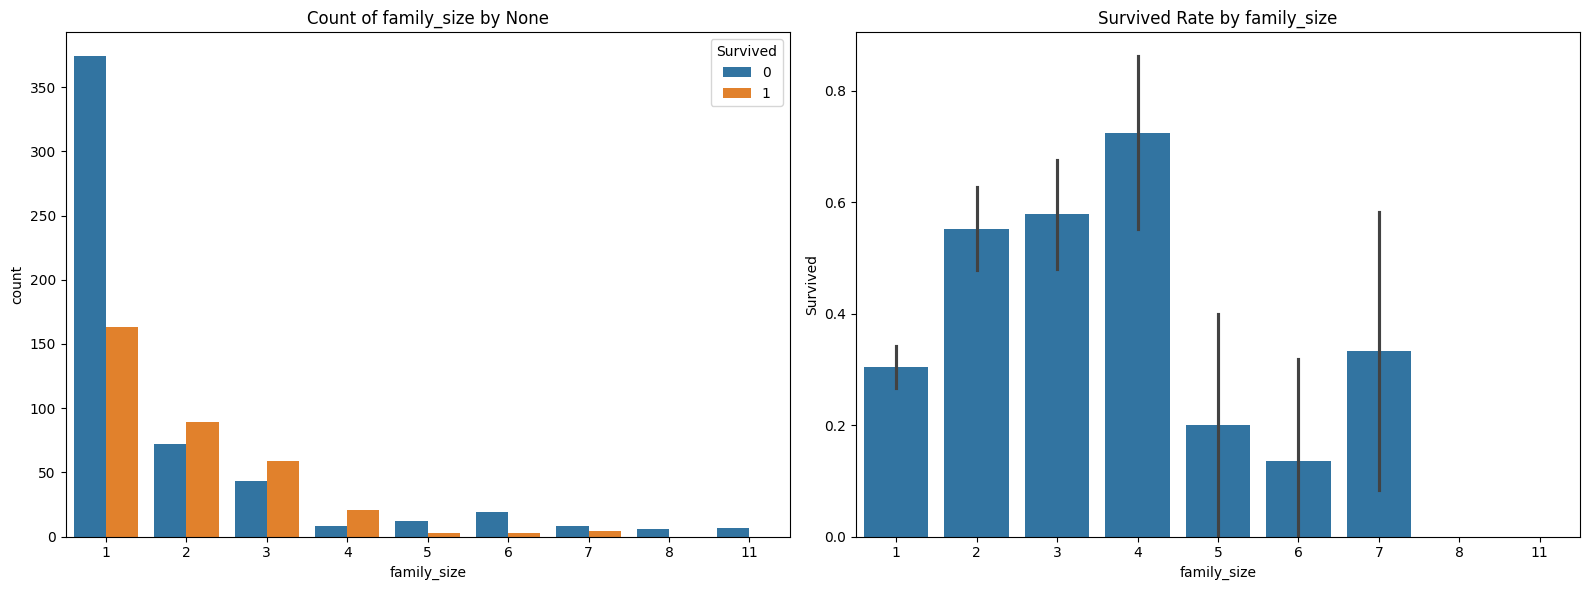

In [ ]:
plot_catfeature_catlabel_comparison(family_size(train), 'family_size', 'Survived')

By creating the 'family_size' feature from 'Parch' + 'SibSp' + 1, a much stronger survival trend can be observed for passengers with a family size of 2, 3, or 4. In contrast, passengers traveling alone or with large families (family_size > 4) have a significantly lower chance of survival.

**Question: What is the relationship between 'Pclass' and 'family_size'? Is there a trend in family size based on social class?**

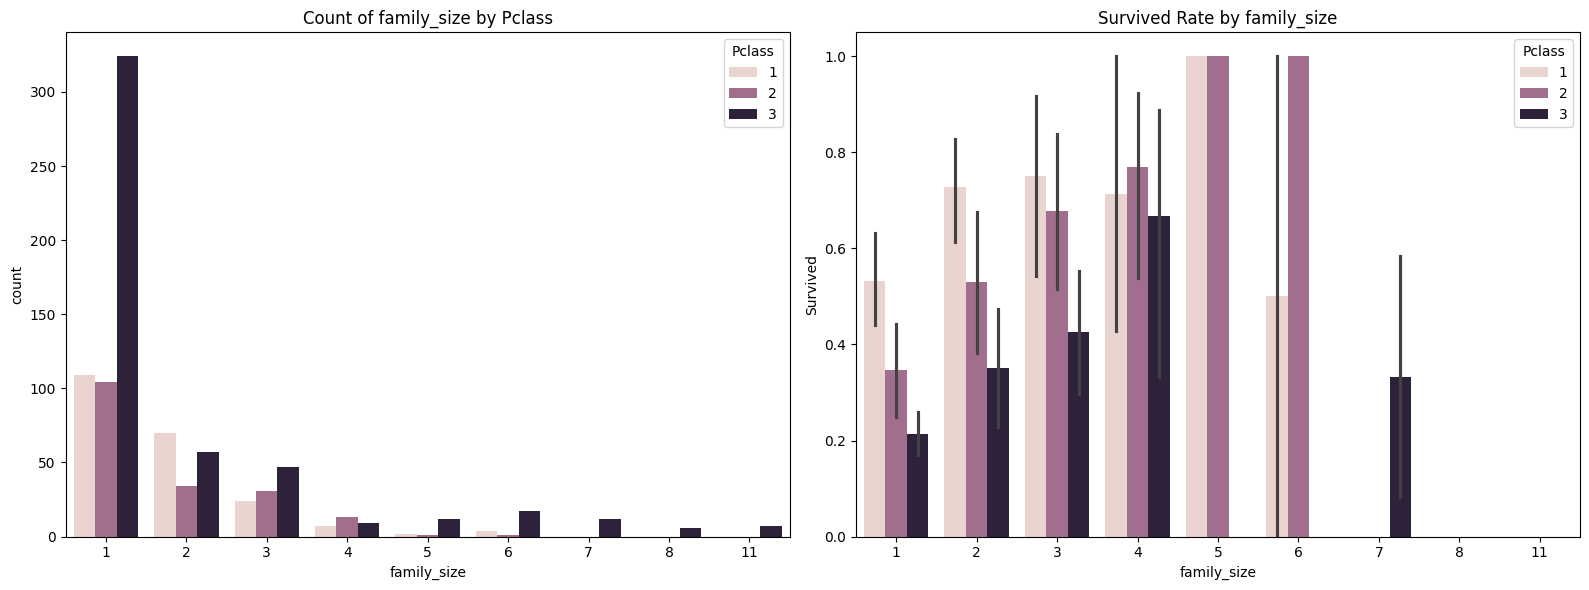

In [ ]:
plot_catfeature_catlabel_comparison(train_sum_sibsp_parch, 'family_size', 'Survived', 'Pclass')

In [ ]:
#cheking the first- and second-class passengers with a family size of 5 or 6
train_sum_sibsp_parch[(train_sum_sibsp_parch['family_size'].isin([5,6])) & (train_sum_sibsp_parch['Pclass'].isin([1,2]))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S,6
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S,6
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,5
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S,6
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,29106,18.750,NaN,S,6
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S,6
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,5
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.000,NaN,S,5


It is evident that for family_size values of 2, 3, and 4, which have the highest survival rates, there are fewer third-class passengers, which likely impacts the observed pattern. However, the 'Survival Rate by Family Size' chart indicates that even among first- and second-class passengers, survival chances are lower when traveling alone. For family_size values of 5 and 6, survival rates in higher classes deviate from the general trend, though there are very few samples for these cases, predominantly consisting of women and passengers with high 'Fare' values.

**Question: Is there a difference in the impact of family size between men and women?**

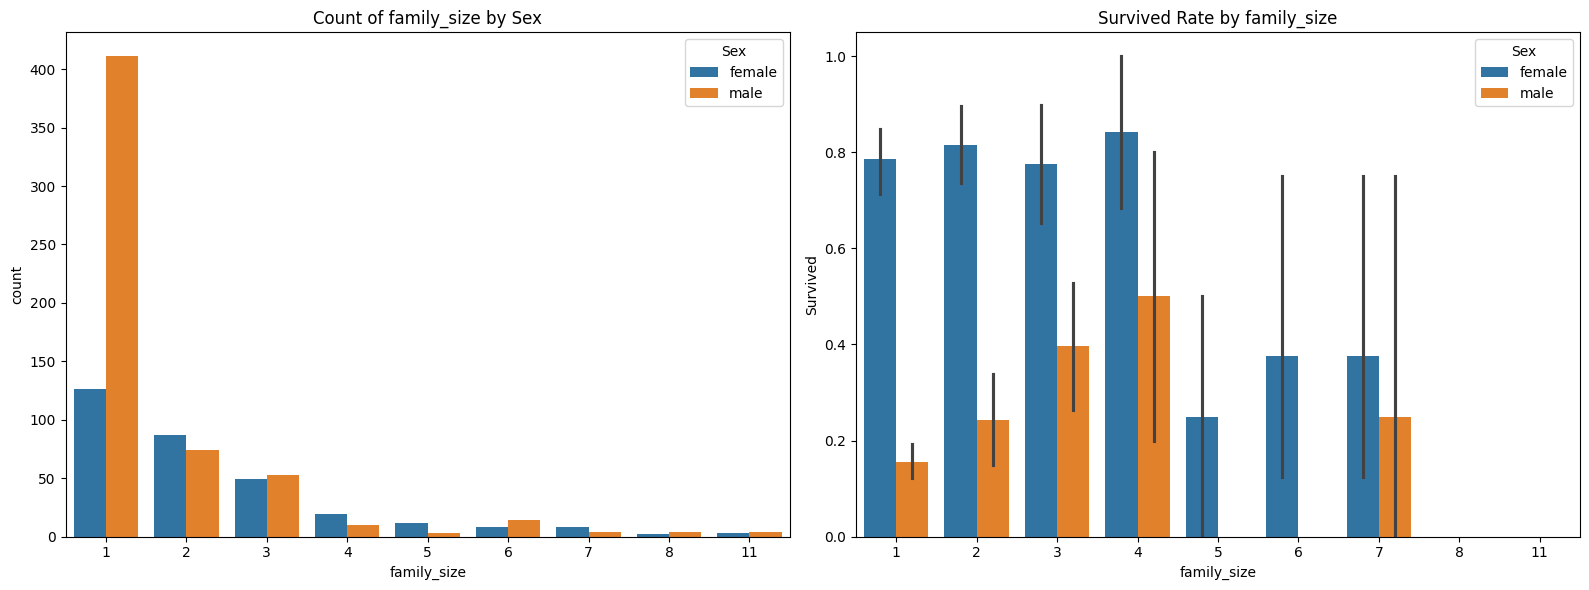

In [ ]:
plot_catfeature_catlabel_comparison(train_sum_sibsp_parch, 'family_size', 'Survived', 'Sex')

For male passengers, the previously observed pattern remains consistent. However, for female passengers, there is a sharp decline in survival chances within very large families, though being alone does not significantly reduce their chances of survival.

**Question: Does the embarkation point affect survival chances?**




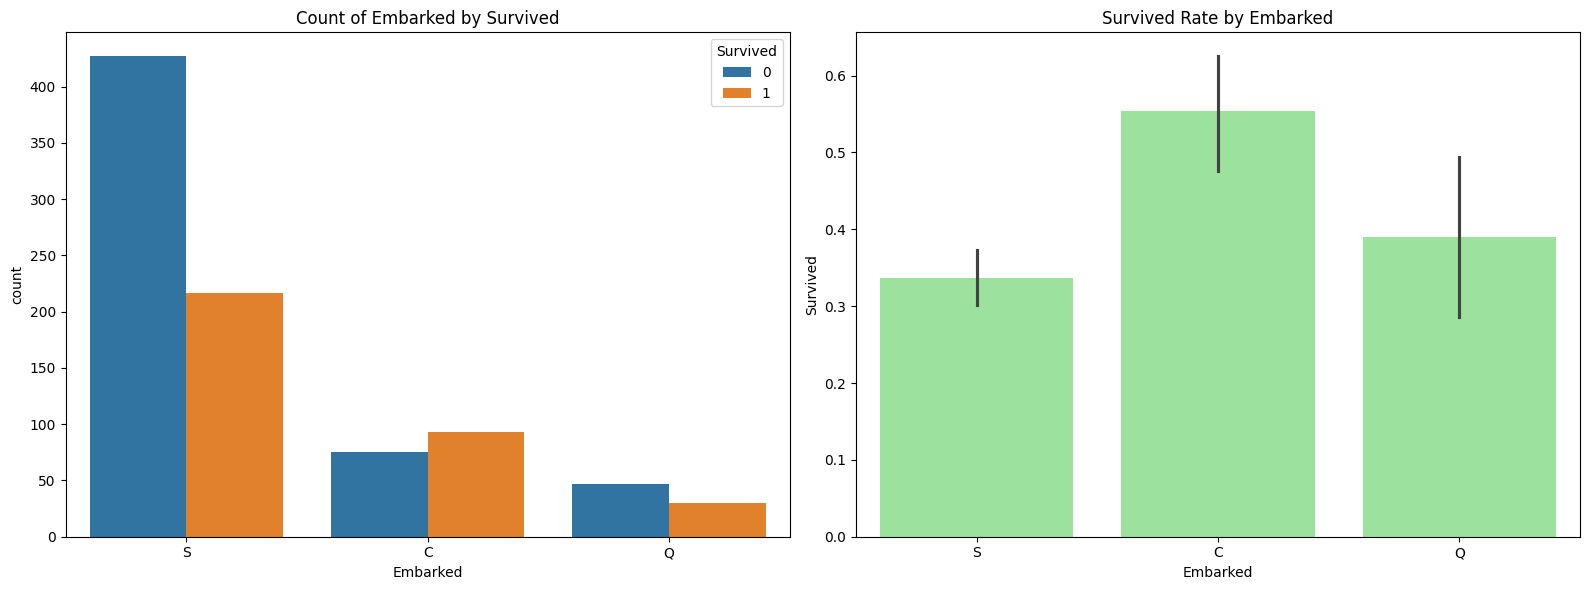

In [ ]:
plot_catfeature_catlabel_comparison(train, 'Embarked', 'Survived')

The vast majority of passengers boarded in Southampton, but it was also the location with the lowest survival rates. In contrast, passengers who embarked in Cherbourg had a survival rate greater than 50%.

**Question: What is the relationship between embarkation points and passenger class?**

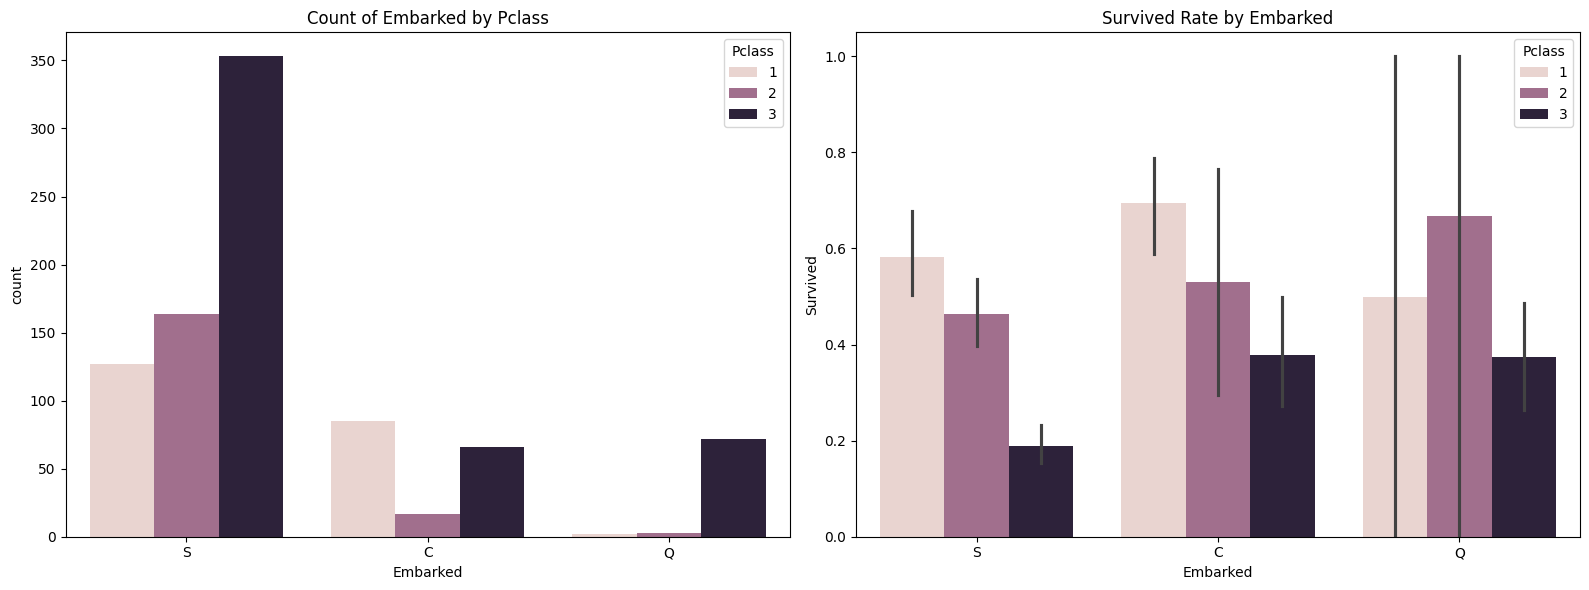

In [ ]:
plot_catfeature_catlabel_comparison(train, 'Embarked', 'Survived', 'Pclass')

In [ ]:
train.groupby('Embarked')['Pclass'].value_counts(normalize= True).unstack()

Pclass,1,2,3
Embarked,,,
C,0.505952,0.101190,0.392857
Q,0.025974,0.038961,0.935065
S,0.197205,0.254658,0.548137


Indeed, the embarkation point 'C' has the highest proportion of first-class passengers. However, overall, it is the point with the highest survival rates, even when comparing survival rates across each class individually.

**Question: What is the impact of 'Fare' on survival chances?**

<Axes: xlabel='Fare', ylabel='Density'>

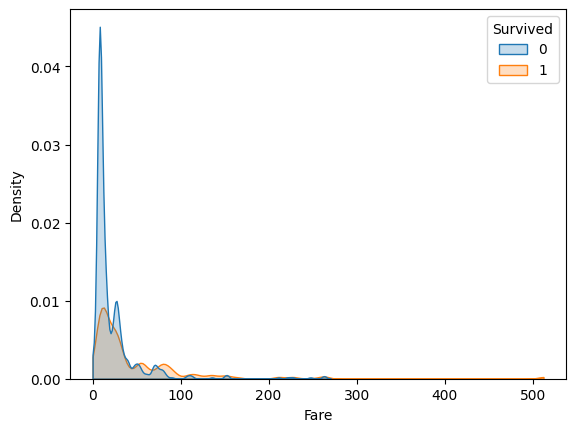

In [ ]:
sns.kdeplot(data=train, x = 'Fare', hue = 'Survived', fill = True,multiple = 'layer',  bw_adjust=0.3, clip=(train['Fare'].min(),train['Fare'].max()))

As previously observed in the distributions, the vast majority of passengers have a 'Fare' lower than 50. However, survival chances increase for higher 'Fare' values.

**Question: Are the lower 'Fare' values concentrated solely among passengers in the lower classes, while the higher values are found in first-class passengers?**

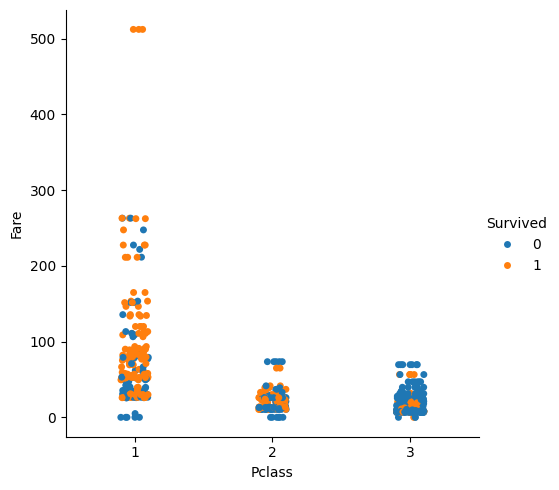

In [ ]:
sns.catplot(data = train, x = 'Pclass', y='Fare', hue='Survived')

The highest 'Fare' values were indeed paid by first-class passengers. However, there are passengers from both third and second class within the 'Fare' range that corresponds to higher survival chances, just as there are first-class passengers who paid lower 'Fare' values.

**Another noteworthy point is the passengers with a 'Fare' of 0, who have a very low chance of survival. Let's take a closer look.**

In [ ]:
train[train['Fare']==0].sort_values(by='Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S


All passengers with a 'Fare' of 0 are men, boarded in Southampton, and were traveling alone. This might partially explain their lower chances of survival. Additionally, some of them share repeated 'Ticket' codes. Although not paying a fare could suggest erroneous data, the common characteristics among these passengers indicate it may reflect a special case, such as complimentary tickets. However, further investigation is needed to confirm if these values are accurate or if they require correction or special treatment in the model.

**Question: Does age impact survival chances?**

<Axes: xlabel='Age', ylabel='Density'>

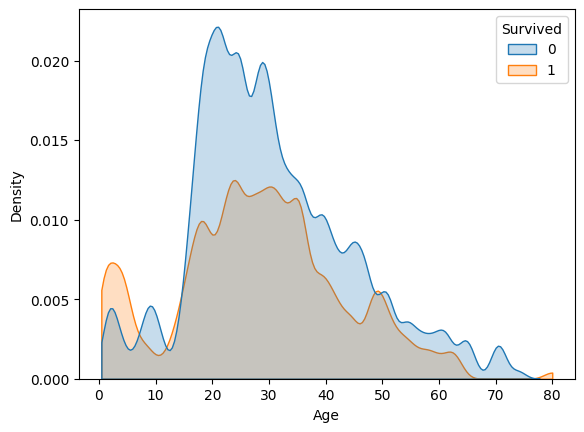

In [ ]:
sns.kdeplot(data=train, x = 'Age', hue = 'Survived', multiple = 'layer',fill = True, bw_adjust=0.3,clip=(train['Age'].min(),train['Age'].max()))

The most striking point regarding the 'Age' variable is that passengers under 10 years old have significantly higher survival chances.

**Question: Is there a difference in the previously observed pattern across different genders?**

<Axes: xlabel='Sex', ylabel='Age'>

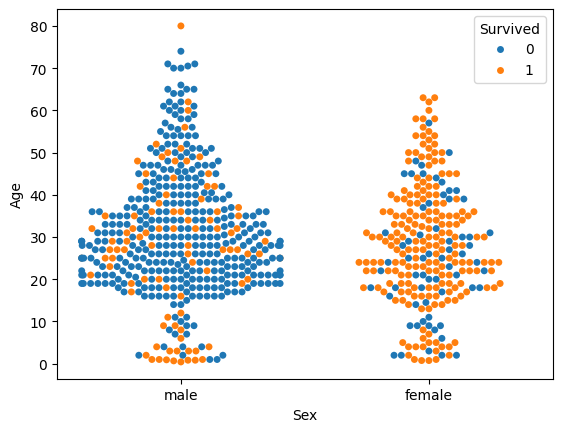

In [ ]:
sns.swarmplot(data = train, x = 'Sex', y='Age', hue='Survived')

Survival chances are much more uniform among females, while in males, there's a noticeable increase in survival for children. This is likely a result of the priority given to rescuing women and children, meaning men were only prioritized during rescue if they were children.

**In the context of higher survival chances for children, what is the impact of family size?**

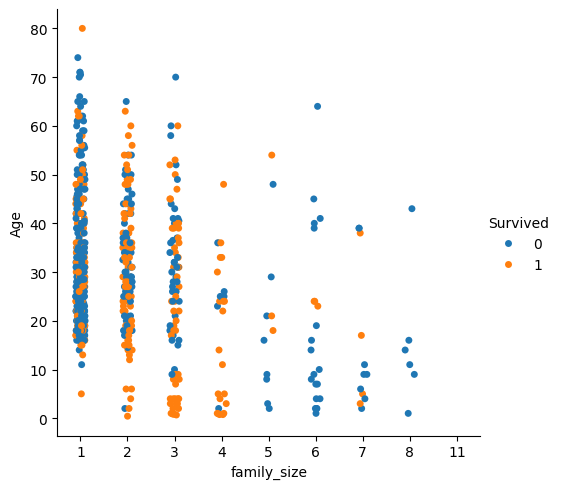

In [ ]:
sns.catplot(data = train_sum_sibsp_parch, x = 'family_size', y='Age', hue='Survived')

It appears that the pattern for children follows the same trend observed earlier regarding family size.

**It’s notable that a passenger under 10 years old has a family_size of 1, meaning they are alone. Let’s take a closer look.**

In [ ]:
train_sum_sibsp_parch[(train_sum_sibsp_parch['family_size'] == 1) & (train_sum_sibsp_parch['Age'] < 10)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S,1


**Since the 'Cabin' value is missing for this instance, let’s check if there are any other passengers with the same 'Ticket' code.**

In [ ]:
train_sum_sibsp_parch[train_sum_sibsp_parch['Ticket'] ==  '364516']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.475,NaN,S,1
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S,1


There is another passenger with the same 'Ticket' code, which likely means they were accompanying the child. Both survived—could this have had a similar effect to having a family_size of 2?

**Pergunta: como posso utilizar a variável 'Name'? Tem informações relevantes?**

Os nomes dos passageiros tem prefixos que contém informações relacionadas a gênero, estado civil, ocupação e classe social.

**Mr.**

Significado: Usado para homens adultos, geralmente casados ou solteiros.


**Mrs.**

Significado: Usado para mulheres casadas ou viúvas. É um título de respeito para mulheres adultas.


**Miss.**

Significado: Usado para mulheres solteiras ou jovens. Também pode ser usado para meninas ou mulheres não casadas.


**Master.**

Significado: Usado para meninos menores de idade (geralmente até 12 anos). Refere-se a um jovem ou criança do sexo masculino.


**Dr.**

Significado: Abreviação de "Doctor". Usado para indivíduos que têm um doutorado ou são médicos.


**Rev.**

Significado: Abreviação de "Reverend". Usado para clérigos ou ministros religiosos.


**Col.**

Significado: Abreviação de "Colonel". Usado para oficiais de alta patente nas forças armadas.


**Major.**

Significado: Usado para oficiais militares de patente de Major.


**Mlle.**

Significado: Abreviação de "Mademoiselle". Usado para senhoritas ou mulheres jovens na França, equivalente a "Miss".


**Mme.**

Significado: Abreviação de "Madame". Usado para mulheres casadas na França, equivalente a "Mrs.".


**Countess.**

Significado: Título nobiliárquico para a esposa de um conde ou uma mulher de alta posição social.


**Lady.**

Significado: Título de respeito para mulheres de alta posição social ou aristocracia.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class TitleFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.title_categories = {
            'Mrs': ['Mrs', 'Mme', 'Ms', 'Lady', 'Countess'],
            'Miss': ['Miss', 'Mlle'],
            'Special': ['Major', 'Col', 'Capt', 'Sir', 'Don', 'Jonkheer', 'Dr'],
            'Rev': ['Rev'],
            'Child': ['Master'],
            'Mr': ['Mr']
        }
        self.title_mapping = {}
        for category, titles in self.title_categories.items():
            for title in titles:
                self.title_mapping[title] = category

    def fit(self, X, y=None):
        # Fit is not used in this case
        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        # Ensure the original DataFrame is preserved
        X = X.copy()

        # Extract titles from names
        X['Title'] = X['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

        # Map the titles to the grouped categories
        X['Title_Grouped'] = X['Title'].map(self.title_mapping)

        # Return the DataFrame with the new column
        return X


In [ ]:
title_extractor = TitleFeatureAdder()
train_title = title_extractor.fit_transform(train)

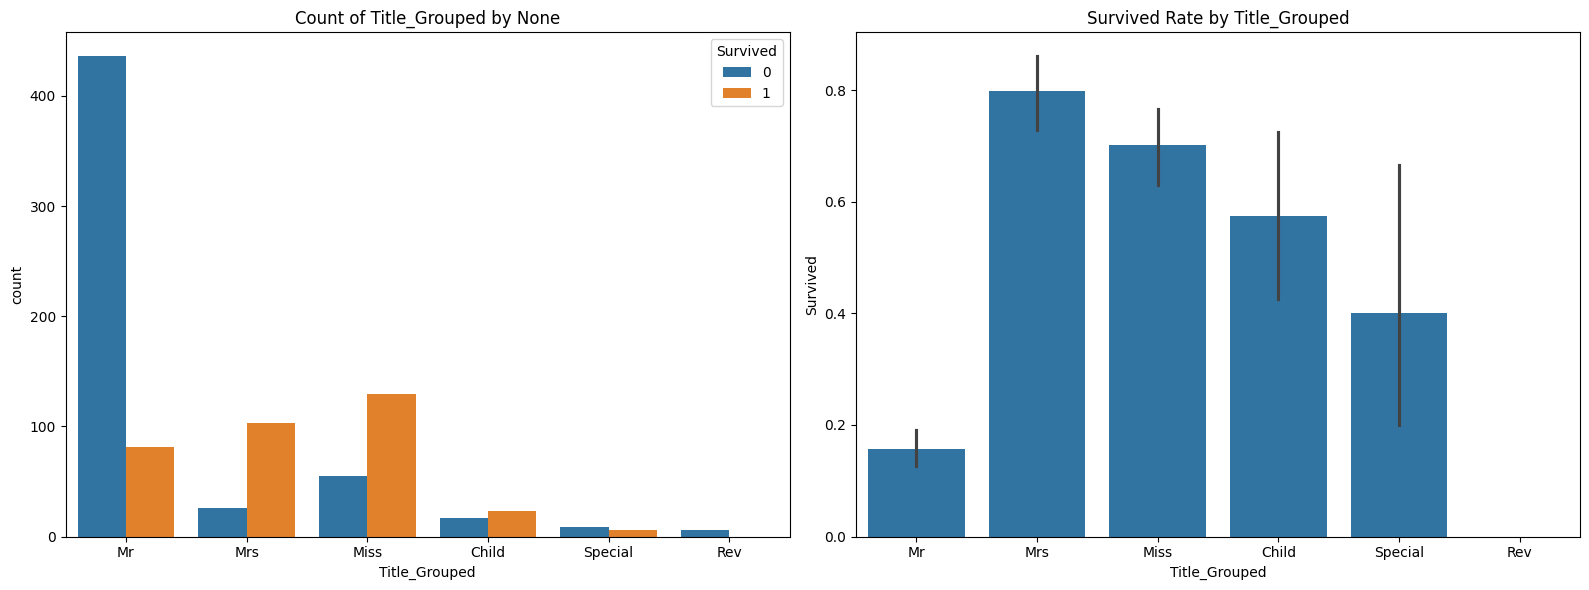

In [ ]:
plot_catfeature_catlabel_comparison(train_title, 'Title_Grouped', 'Survived')

**Question: Is there any useful pattern in the ticket code?**

In [ ]:
#Extract Ticket Lenght
def extract_ticket_length(data):
  data_copy = data.copy()
  data_copy['Ticket_Length'] = data_copy['Ticket'].apply(len)
  return data_copy

In [ ]:
train_ticket = extract_ticket_length(train)

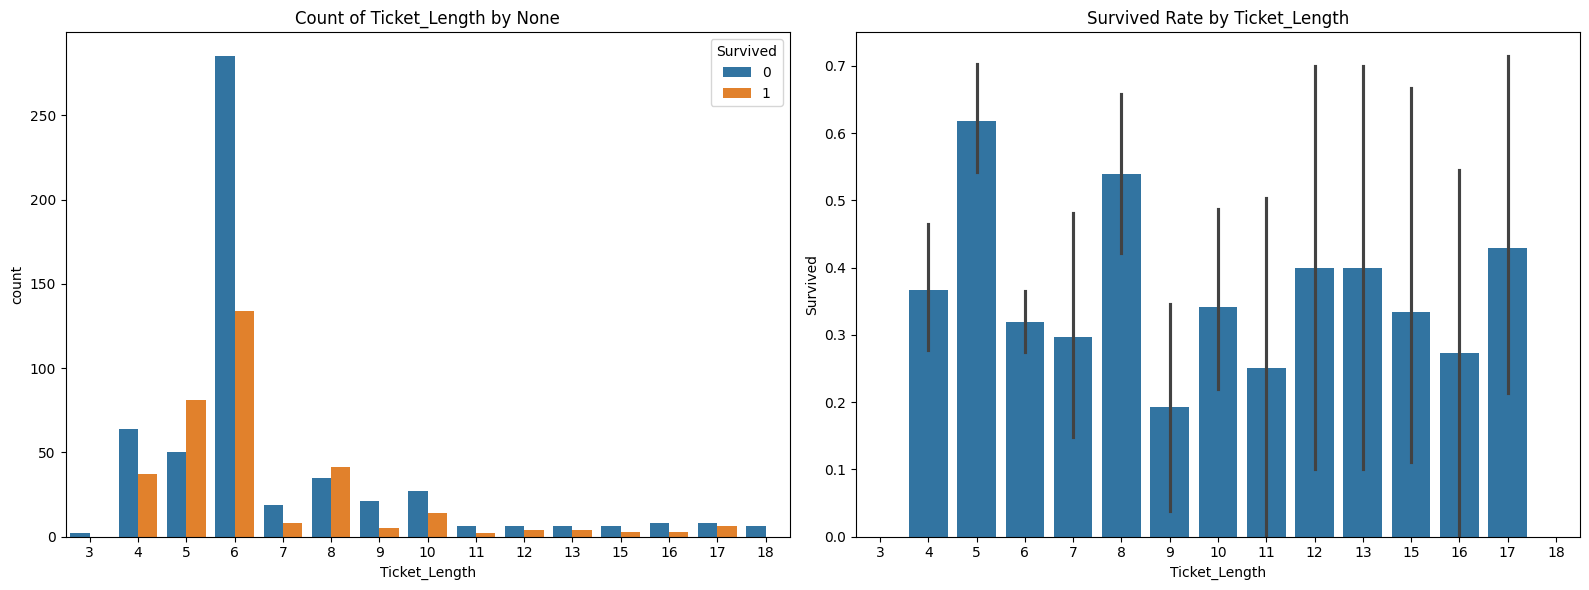

In [ ]:
plot_catfeature_catlabel_comparison(train_ticket, 'Ticket_Length', 'Survived')

In [ ]:
train_ticket[train_ticket['Ticket_Length'] == 8].sort_values(by='Ticket').head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Known,Ticket_Length,Ticket_Leading_Letter,Ticket_Prefix
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0,8,A/,A/
454,455,0,3,"Peduzzi, Mr. Joseph",male,NaN,0,0,A/5 2817,8.0500,NaN,S,0,8,A/,A/
668,669,0,3,"Cook, Mr. Jacob",male,43.0,0,0,A/5 3536,8.0500,NaN,S,0,8,A/,A/
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S,0,8,A/,A/
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S,0,8,A/,A/
592,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.2500,NaN,S,0,8,A/,A/
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,0,8,A/,A/
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S,0,8,A/,A/S
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S,0,8,CA,CA.
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,0,8,CA,CA.


In [ ]:
#Extract 2 Leading Letter
def extract_2leading_letter(data):
  data_copy = data.copy()
  data_copy['Ticket_Leading_Letter'] = data_copy['Ticket'].apply(lambda x: x[:2])
  return data_copy

In [ ]:
 train_ticket_leading_letter = extract_2leading_letter(train)

In [ ]:
def big_count_plot(data, x):
  counts = data.groupby(x).size()
  plt.figure(figsize=(37, 6))
  counts.sort_index().plot(kind='bar', color='skyblue')
  plt.show()

In [ ]:
def big_mean_survived_plot(data, x):
  counts = data.groupby(x)['Survived'].mean()
  plt.figure(figsize=(37, 6))
  counts.sort_index().plot(kind='bar', color='lightgreen')
  plt.show()

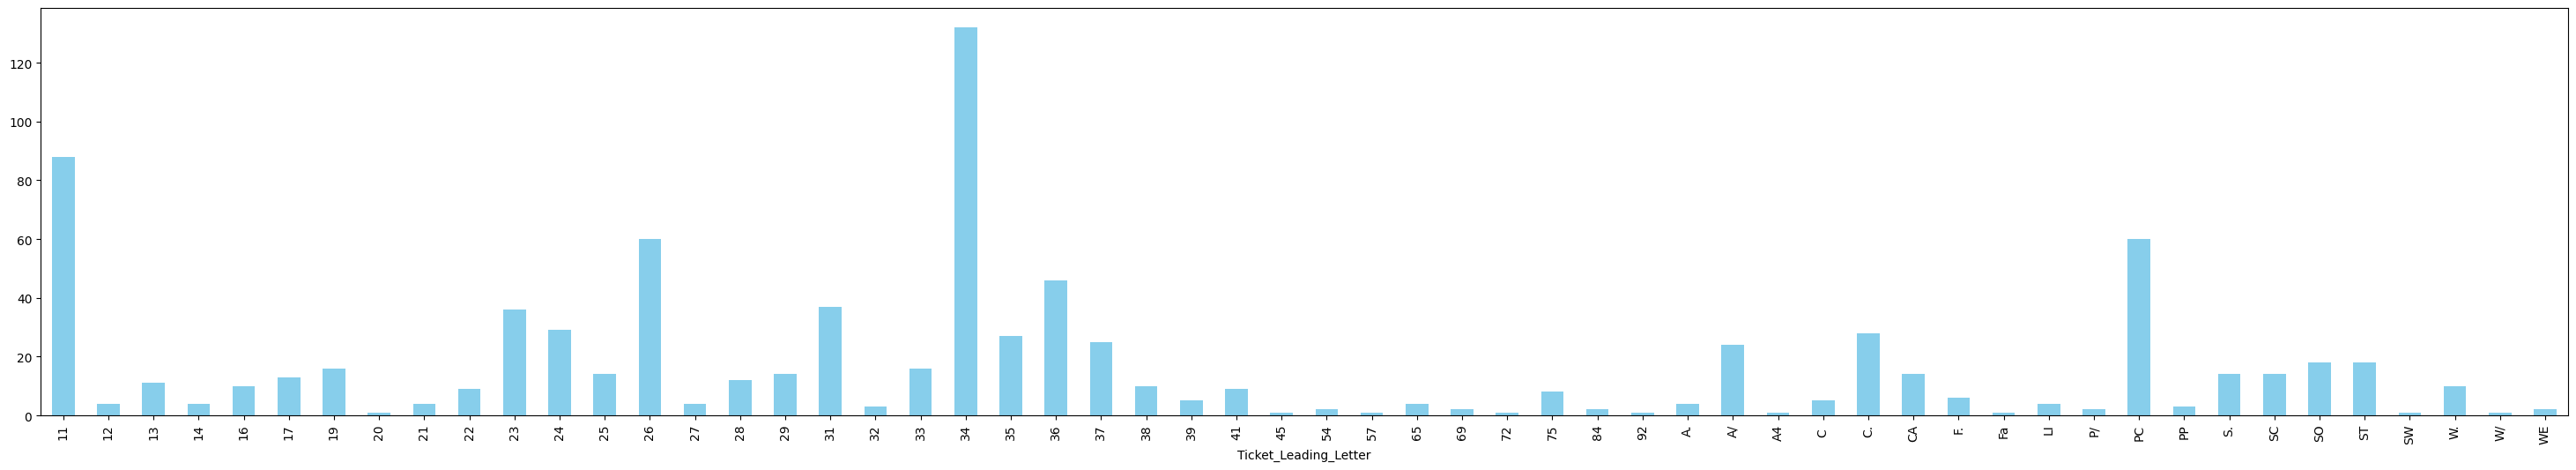

In [ ]:
big_count_plot(train_ticket_leading_letter, 'Ticket_Leading_Letter')

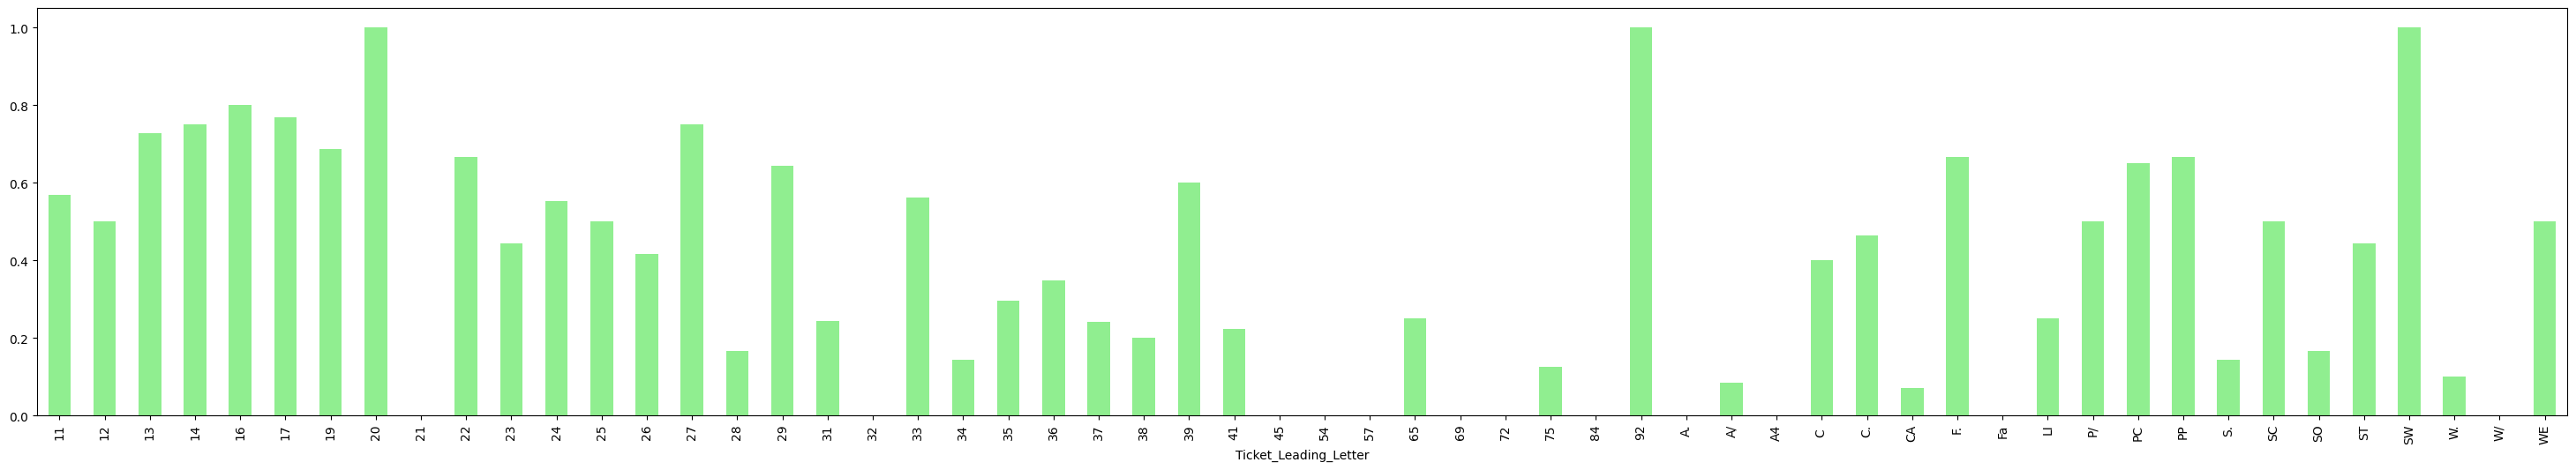

In [ ]:
big_mean_survived_plot(train_ticket_leading_letter, 'Ticket_Leading_Letter')

In [ ]:
train_ticket['Ticket_Leading_Letter'] = train_ticket['Ticket'].apply(lambda x: x[:1])

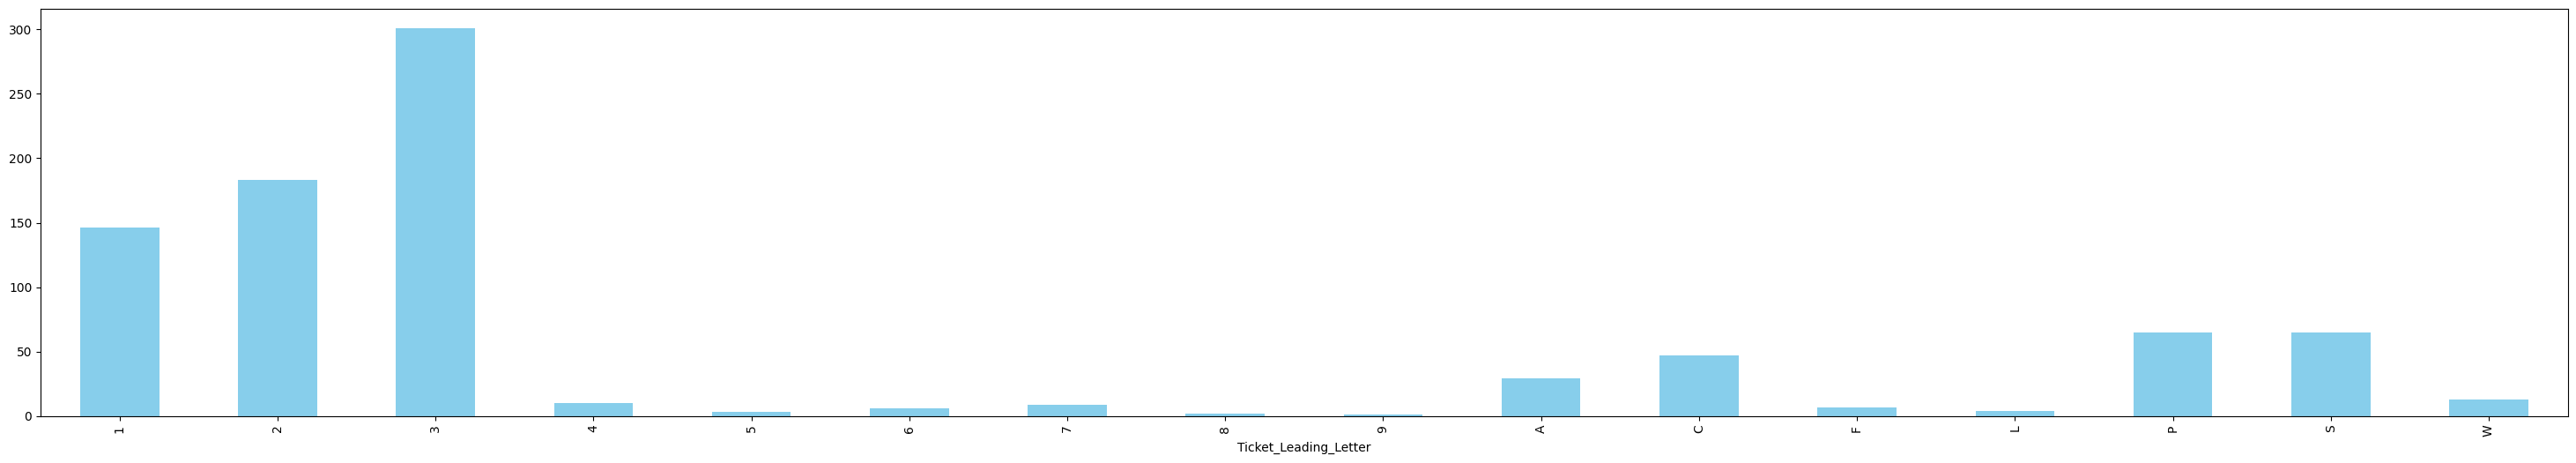

In [ ]:
# Contar o número de passageiros por número de cabine
cabin_counts = train_ticket.groupby('Ticket_Leading_Letter').size()

# Inverter os eixos e criar um gráfico de barras
plt.figure(figsize=(37, 6))
cabin_counts.sort_index().plot(kind='bar', color='skyblue')

# Exibir o gráfico
plt.show()

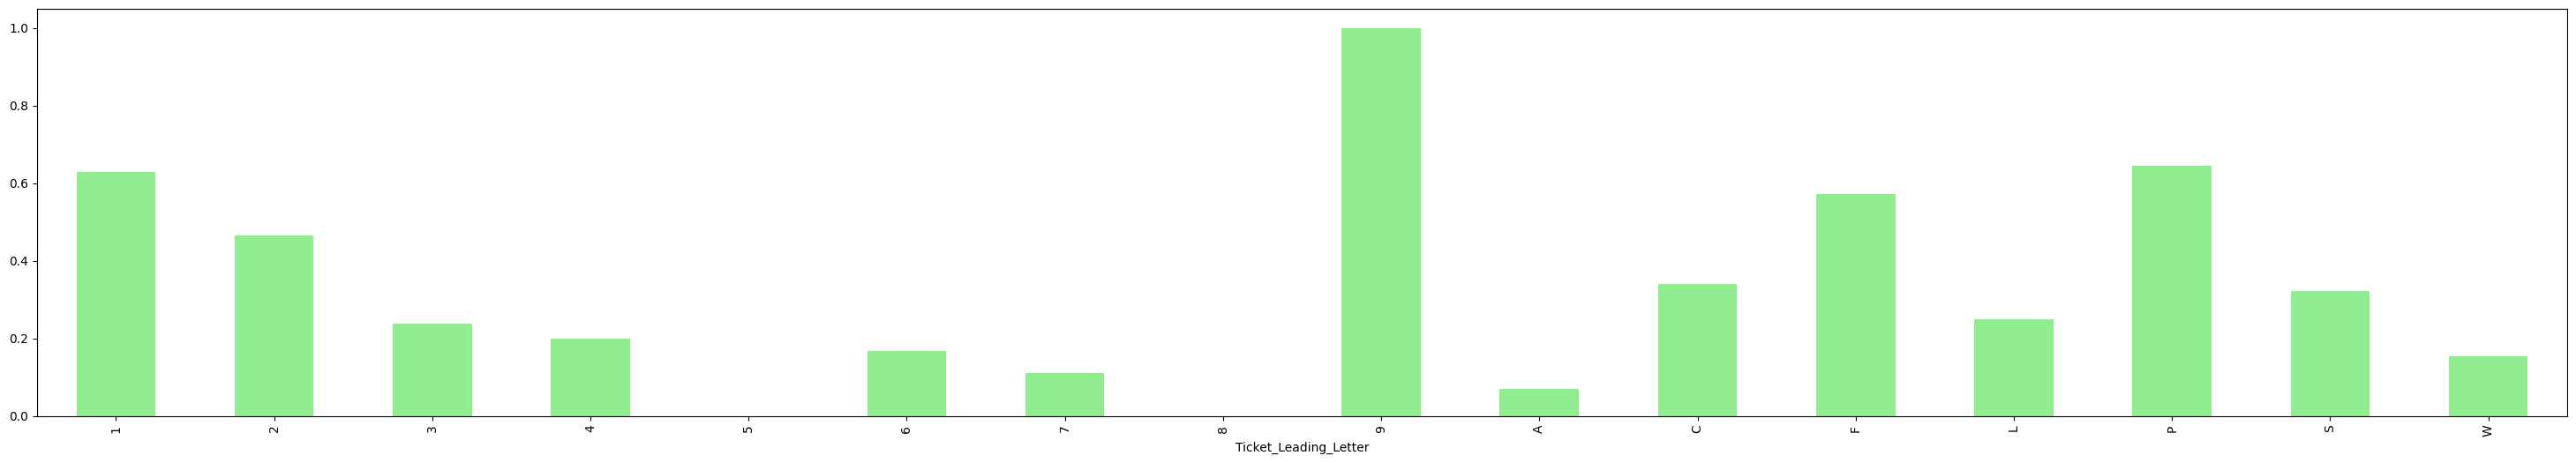

In [ ]:
# Contar o número de passageiros por número de cabine
cabin_counts = train_ticket.groupby('Ticket_Leading_Letter')['Survived'].mean()

# Inverter os eixos e criar um gráfico de barras
plt.figure(figsize=(37, 6))
cabin_counts.sort_index().plot(kind='bar', color='lightgreen')

# Exibir o gráfico
plt.show()

In [ ]:
train_ticket['Ticket_Prefix'] = train_ticket['Ticket'].str.extract(r'([A-Za-z./]+)')

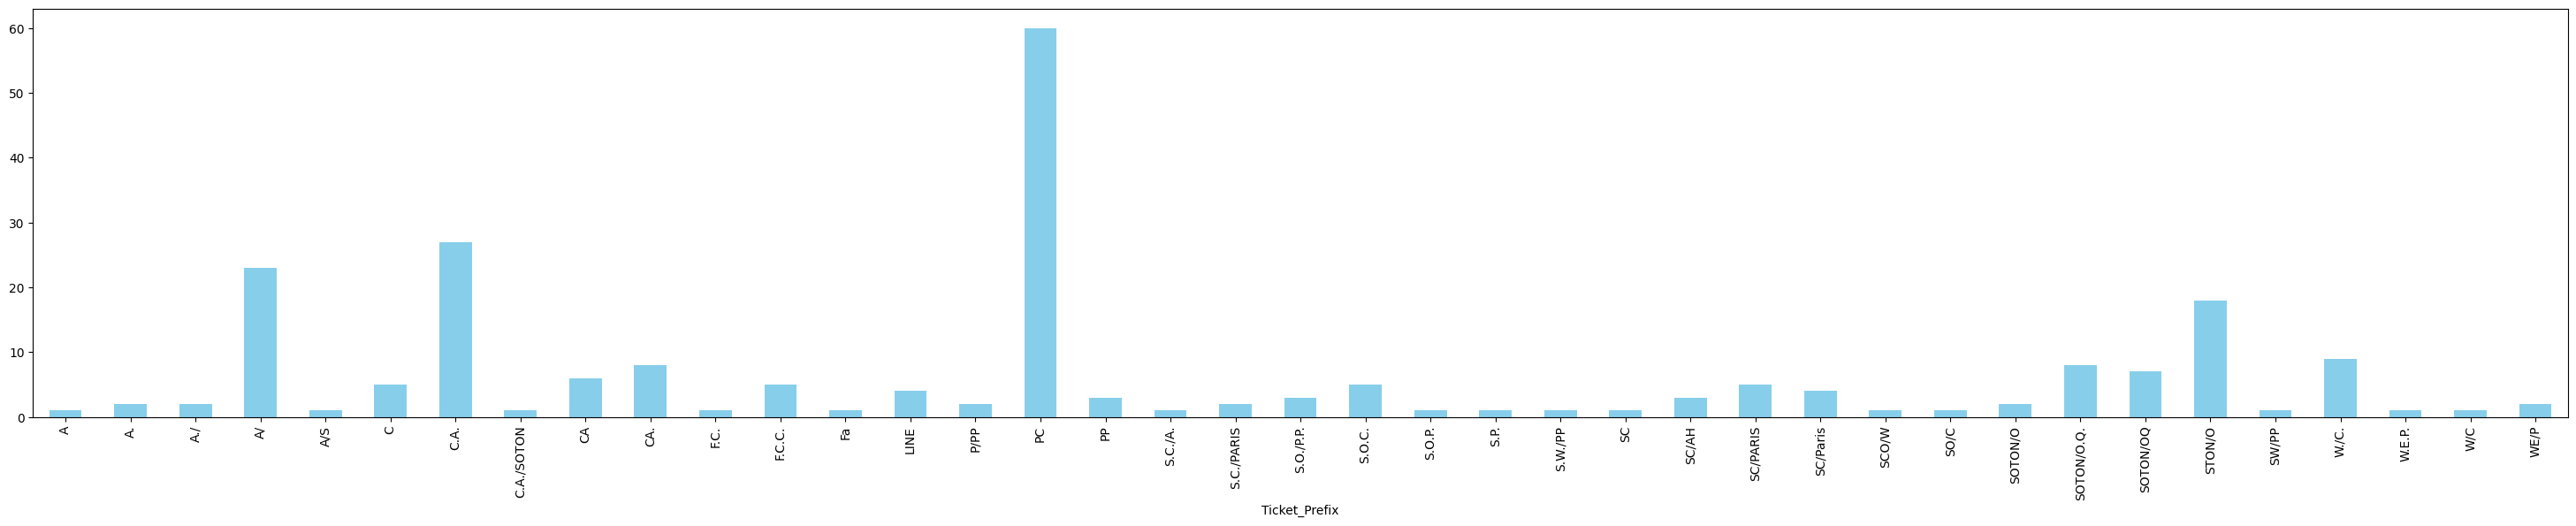

In [ ]:
# Contar o número de passageiros por número de cabine
cabin_counts = train_ticket.groupby('Ticket_Prefix').size()

# Inverter os eixos e criar um gráfico de barras
plt.figure(figsize=(37, 6))
cabin_counts.sort_index().plot(kind='bar', color='skyblue')

# Exibir o gráfico
plt.show()

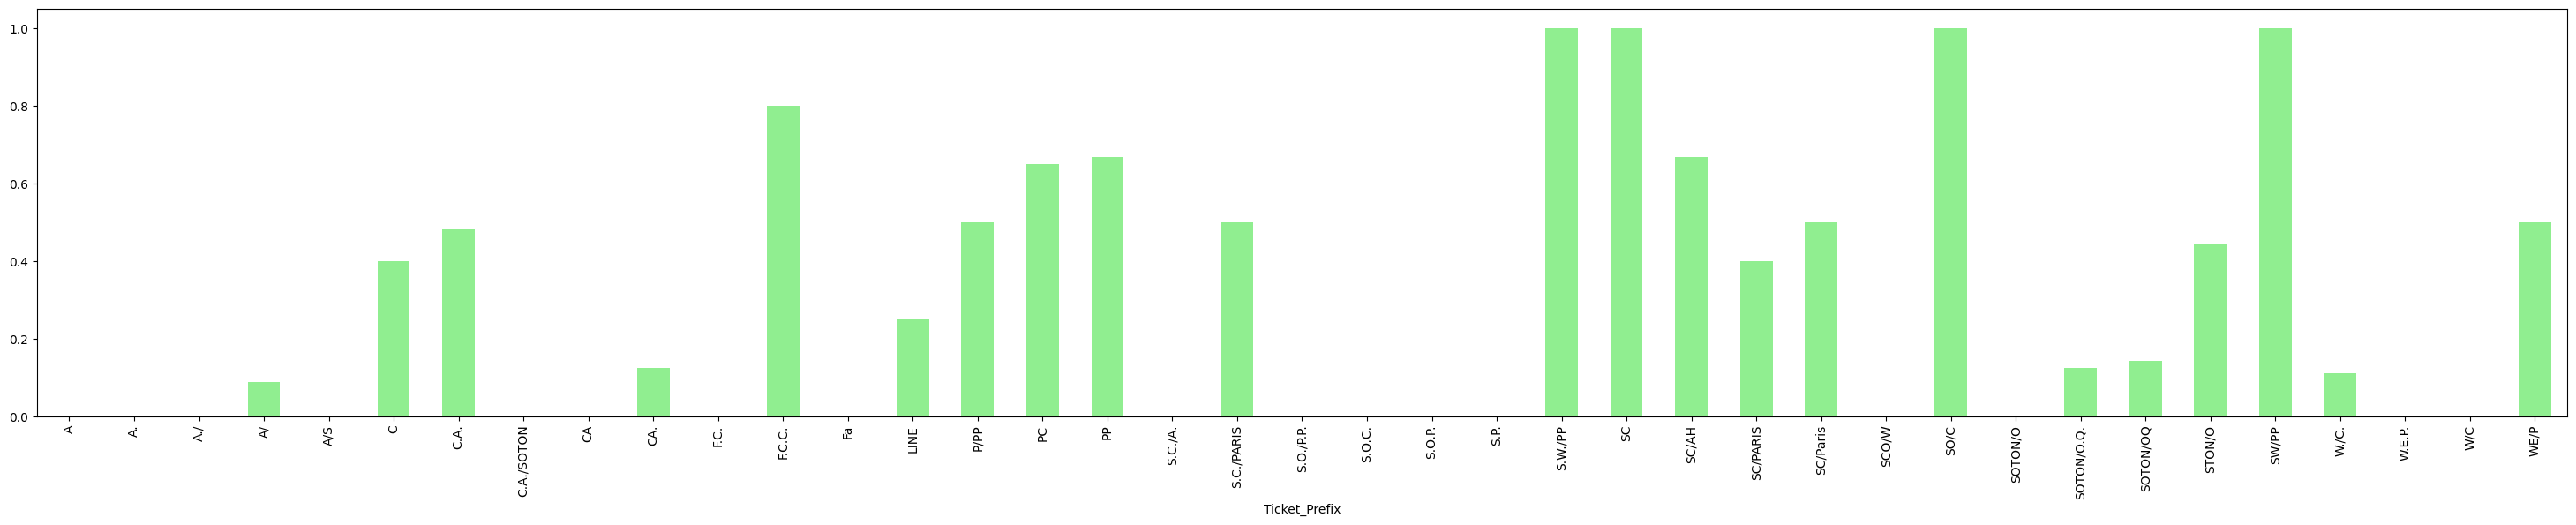

In [ ]:
# Contar o número de passageiros por número de cabine
cabin_counts = train_ticket.groupby('Ticket_Prefix')['Survived'].mean()

# Inverter os eixos e criar um gráfico de barras
plt.figure(figsize=(37, 6))
cabin_counts.sort_index().plot(kind='bar', color='lightgreen')

# Exibir o gráfico
plt.show()

**Question: Is there any useful information that can be extracted from the Cabin?**

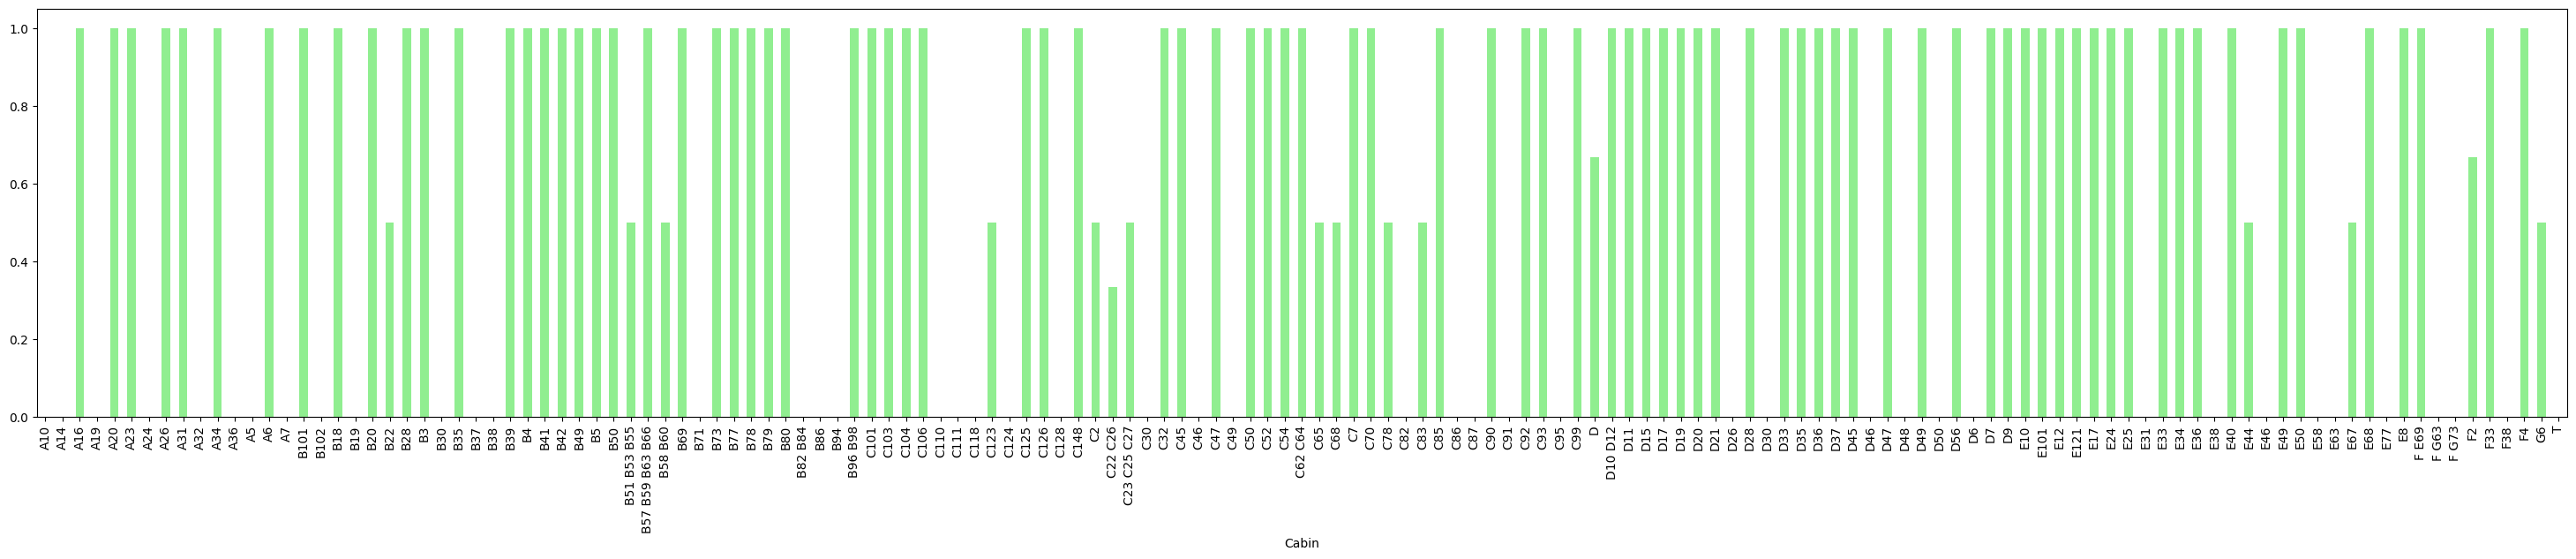

In [ ]:
big_mean_survived_plot(train, 'Cabin')

In [60]:
def extract_cabin_letter(data):
  data_copy = data.copy()
  data_copy['Deck'] = data_copy['Cabin'].str[0].fillna('Unknown')
  return data_copy

In [61]:
train_cabin_deck = extract_cabin_letter(train)

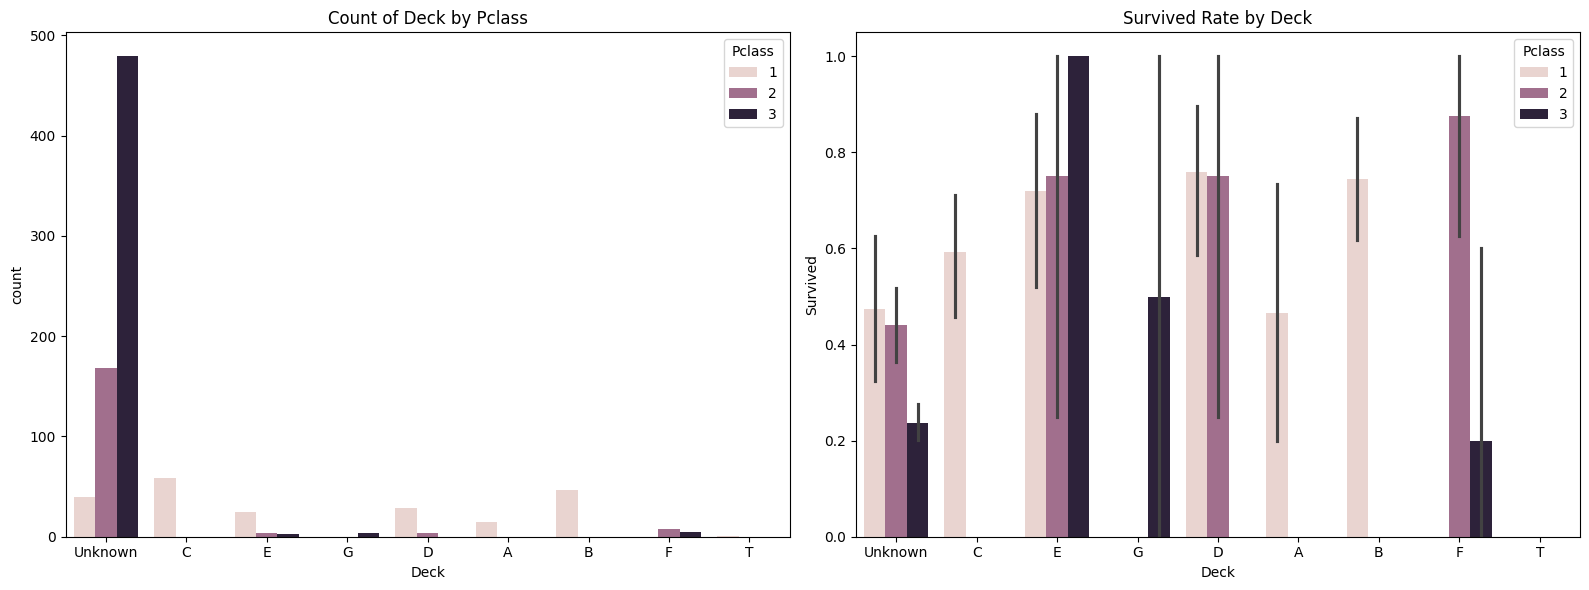

In [62]:
plot_catfeature_catlabel_comparison(train_cabin_deck, 'Deck','Survived' ,'Pclass')

In [64]:
def Cabin_Known(data):
  data_copy = data.copy()
  data_copy['Cabin_Known'] = data_copy['Cabin'].notnull().astype(int)
  return data_copy

In [65]:
train_cabin_known = Cabin_Known(train)

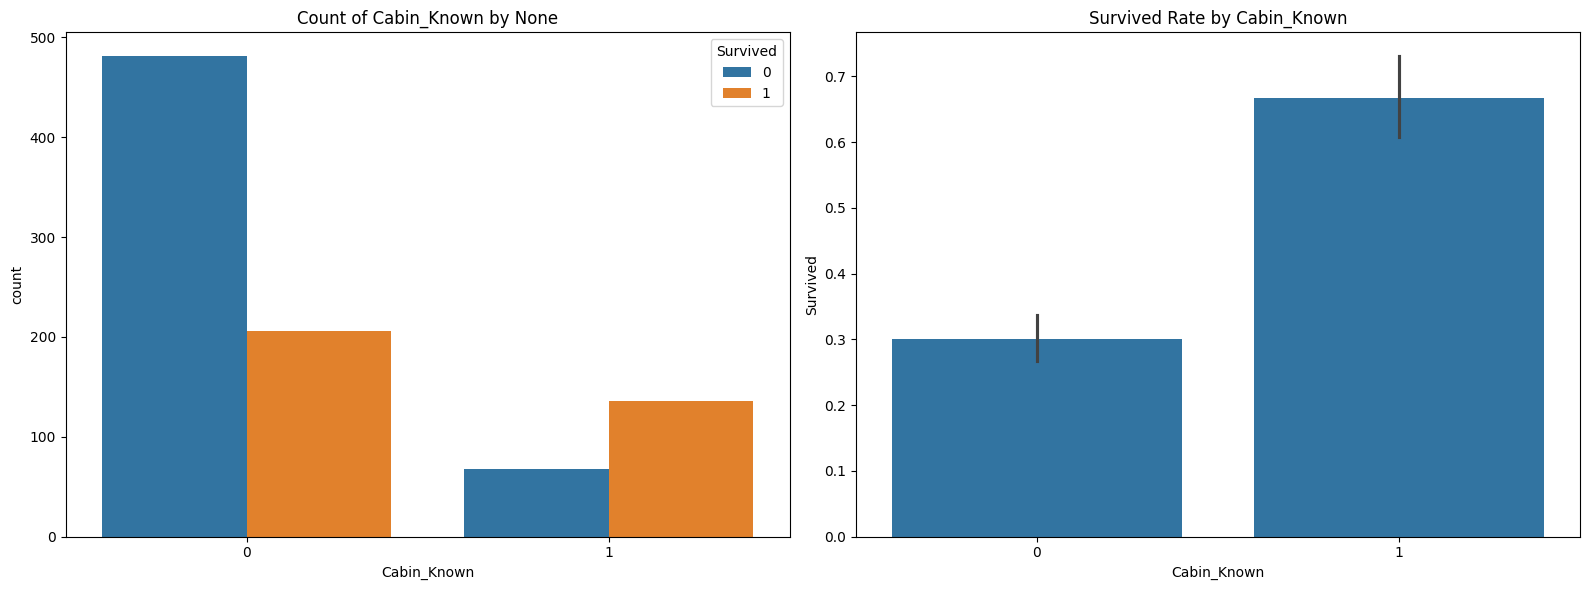

In [66]:
plot_catfeature_catlabel_comparison(train_cabin_known, 'Cabin_Known','Survived')

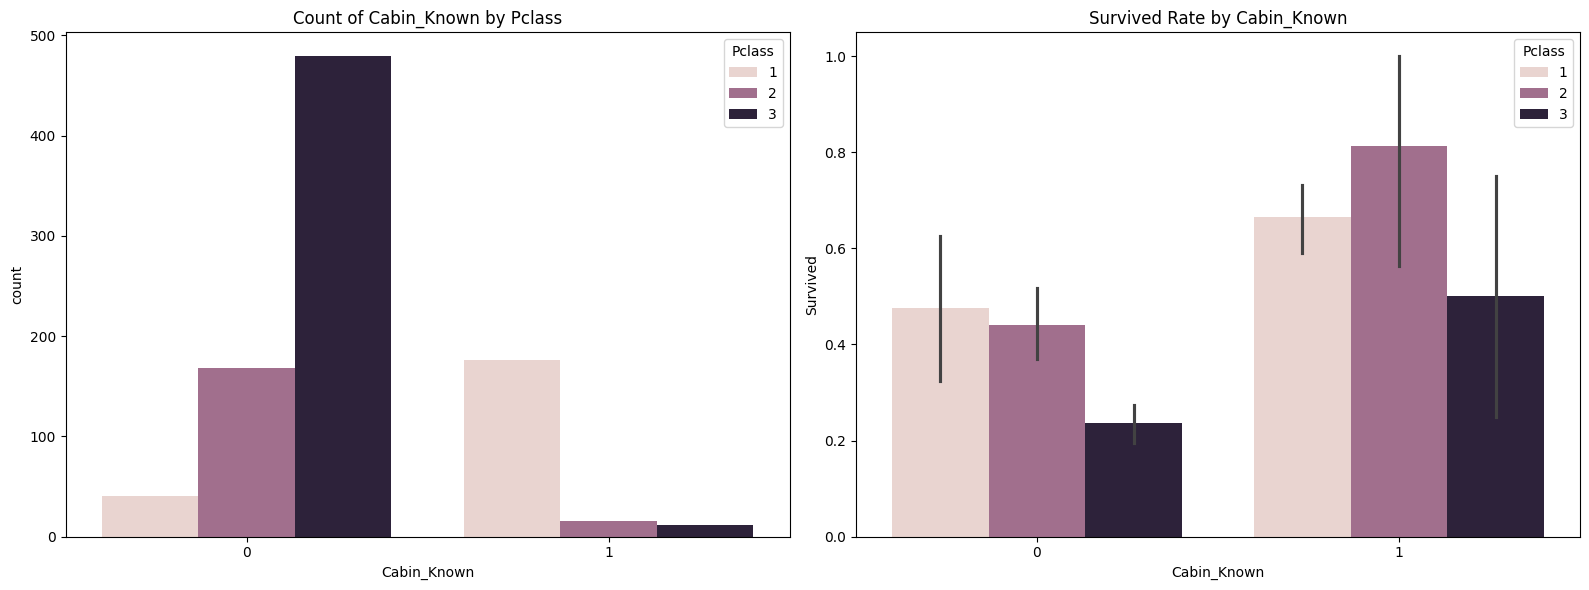

In [67]:
plot_catfeature_catlabel_comparison(train_cabin_known, 'Cabin_Known','Survived', 'Pclass')

In [81]:
def count_passengers_per_cabin(data):
  data_copy = data.copy()
  cabin_counts = data_copy['Cabin'].value_counts()
  data_copy['Passenger_per_cabin'] = data_copy['Cabin'].map(cabin_counts)
  data_copy['Passenger_per_cabin'].fillna(0, inplace=True)
  return data_copy

In [82]:
train_passenger_per_cabin = count_passengers_per_cabin(train)

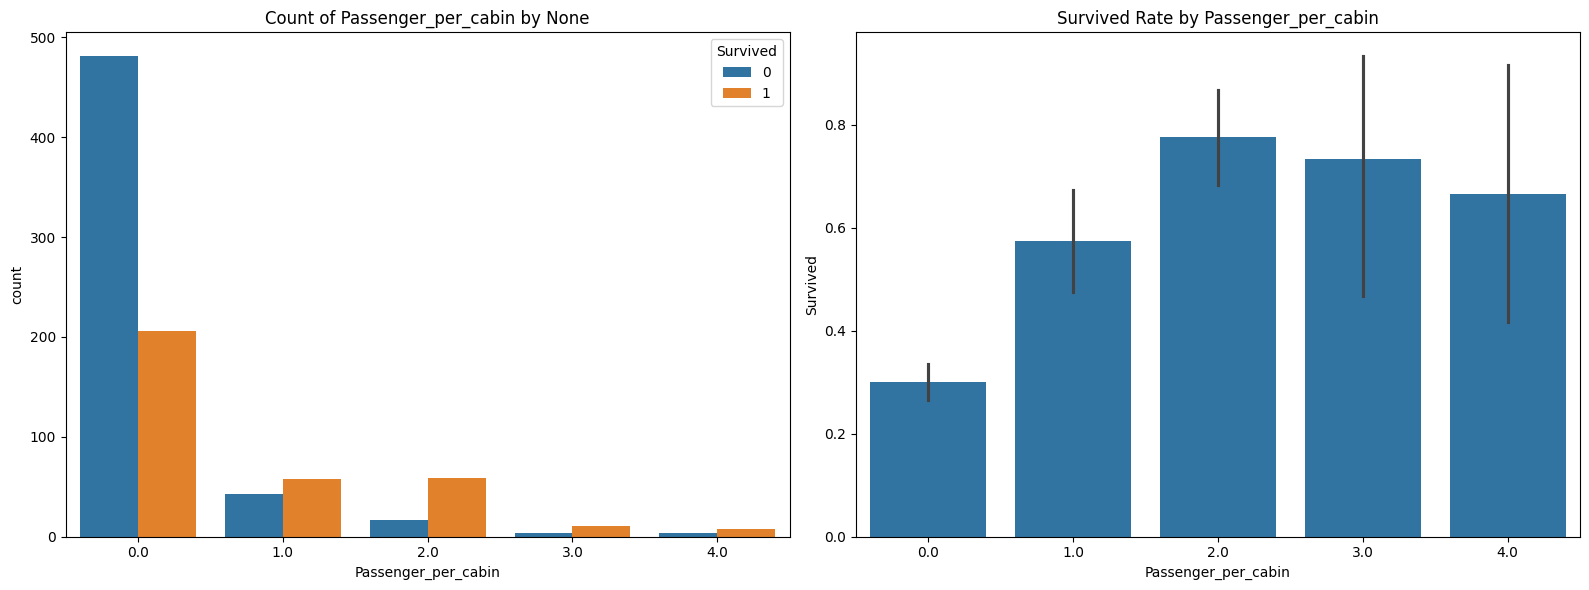

In [83]:
plot_catfeature_catlabel_comparison(train_passenger_per_cabin, 'Passenger_per_cabin','Survived')

In [87]:
# Criar a nova coluna 'Cabin_num', que contém o número de cabines para cada passageiro
def count_cabin_per_passengers(data):
  data_copy = data.copy()
  data_copy['Cabin_quantity'] = data_copy['Cabin'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
  return data_copy

In [88]:
train_cabin_per_passenger = count_passengers_per_cabin(train)
train_cabin_per_passenger

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger_per_cabin,Passener_per_cabin,Cabin_quantity
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,2.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,1.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0,1.0,1


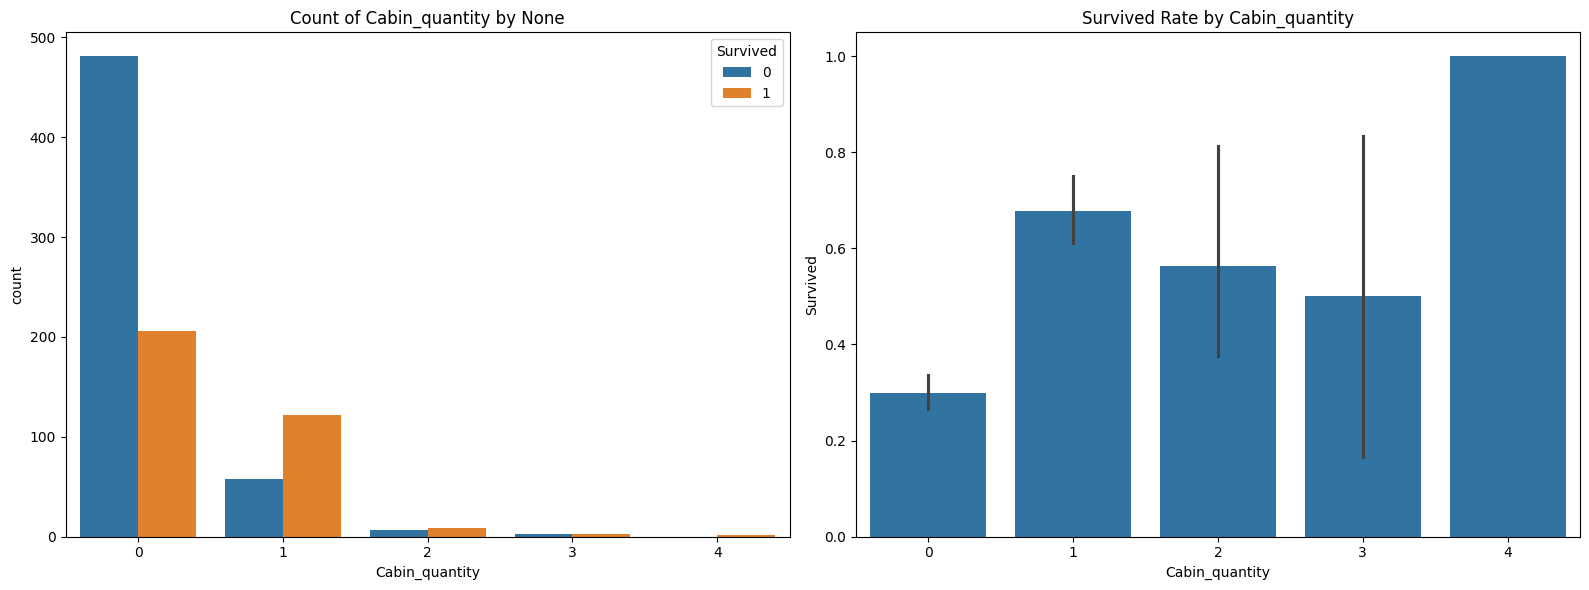

In [ ]:
plot_catfeature_catlabel_comparison(train_cabin, 'Cabin_quantity','Survived')

In [ ]:
# Função para extrair apenas números de uma string usando métodos de string
def extract_numbers(cabin_string):
    return ''.join(filter(str.isdigit, str(cabin_string)))

# Aplicar a função à coluna 'Cabin'
train_cabin['Cabin_Numbers'] = train_cabin['Cabin'].apply(extract_numbers)

train_cabin['Cabin_Numbers'] = pd.to_numeric(train_cabin['Cabin_Numbers'], errors='coerce')

#train_cabin = train_cabin.dropna(subset=['Cabin_Numbers'])

# Garantir que a coluna seja do tipo float
#train_cabin['Cabin_Numbers'] = train_cabin['Cabin_Numbers'].astype(float)

In [ ]:
train_cabin.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Cabin_Known,Passenger_per_cabin,Cabin_quantity,Cabin_Numbers
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1,1.0,1,85.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1,2.0,1,123.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E,1,1.0,1,46.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,G,1,4.0,1,6.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,C,1,1.0,1,103.0
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,D,1,1.0,1,56.0
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,A,1,1.0,1,6.0
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,C,1,4.0,3,232527.0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,B,1,1.0,1,78.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,D,1,2.0,1,33.0


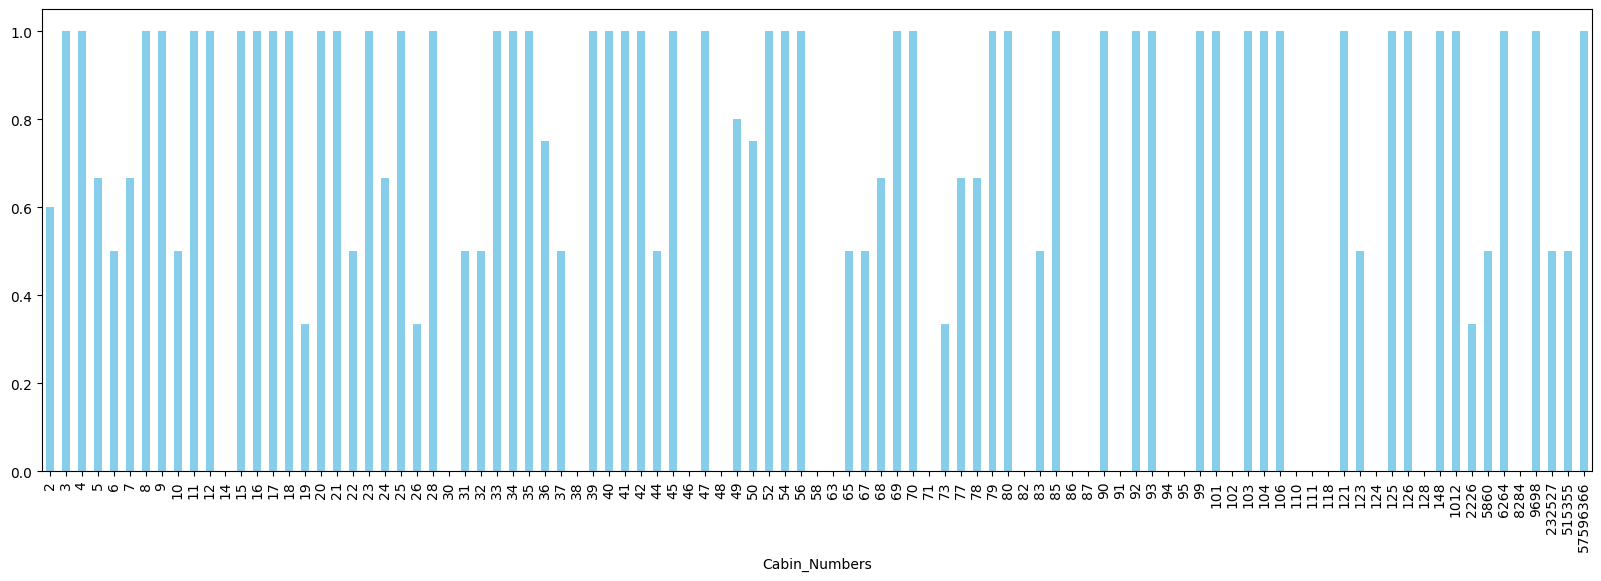

In [ ]:
# Contar o número de passageiros por número de cabine
cabin_counts = train_cabin.groupby('Cabin_Numbers')['Survived'].mean()

# Inverter os eixos e criar um gráfico de barras
plt.figure(figsize=(20, 6))
cabin_counts.sort_index().plot(kind='bar', color='skyblue')

# Exibir o gráfico
plt.show()

# **STEP 3 - DATA PREPARATION**

Based on the previous analysis, we can now perform an initial data preprocessing step to prepare the data for classification models. Simple methods will be applied, and the results from this first iteration will serve as a baseline to assess the impact of further preprocessing and feature engineering in subsequent iterations

In [ ]:
#Creating copies of the training and testing datasets
train_v1 = train.copy()
test_v1 = test.copy()

**To handle the null values in the 'Age' column in this step 1, the null values will be replaced by the mean of the other values**

In [ ]:
#treating null values ​​in the 'Age' column
train_v1['Age'] = train_v1['Age'].fillna(train_v1['Age'].mean())
test_v1['Age'] = test_v1['Age'].fillna(test_v1['Age'].mean())

**For the 'Fare' feature, which shows significant skewness due to outliers from passengers who paid very high amounts, the null values will be replaced with the median"**

In [ ]:
#treating null values ​​in the 'Fare' column
test_v1['Fare'] = test_v1['Fare'].fillna(test_v1['Fare'].median())

**Since the 'Embarked' column does not have numerical values, instead of replacing the null values with the mean, they will be replaced with the mode.**

In [ ]:
#treating null values ​​in the 'Embarked' column
train_v1['Embarked'] = train_v1['Embarked'].fillna(train_v1['Embarked'].mode()[0])
test_v1['Embarked'] = test_v1['Embarked'].fillna(test_v1['Embarked'].mode()[0])

**The 'Cabin' feature has many missing values and high cardinality, so we will remove it in this first iteration, along with the 'Name' and 'Ticket' features, which also have high cardinality. These features may be addressed differently later, after a more in-depth exploratory data analysis.**

As previously observed, there are outliers present in the variables Age and Fare. Age has a more uniform distribution, while Fare has many outliers, with numerous passengers having paid a very high fare.

In [ ]:
#dropping high cardinality columns
train_v1 = train_v1.drop(columns=['Name','Ticket','Cabin'])
test_v1 = test_v1.drop(columns=['Name','Ticket','Cabin'])

**Checking if the columns were removed**

In [ ]:
#checking if the columns have been removed(train database)
train_v1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [ ]:
#checking if the columns have been removed(test database)
test_v1.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

**checking if the null values have been handled in the datasets**

In [ ]:
#checking null values ​​in the train database
train_v1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
#checking null values ​​in the test database
test_v1.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# **Processing the textual features**

**checking which text columns remain after the initial treatments**

In [ ]:
#checking text columns
train_v1.columns[train_v1.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

**checking the values in the 'Sex' column**

In [ ]:
train_v1.Sex.unique()

array(['male', 'female'], dtype=object)

**Since there are two possible values, we will replace 'male' with 1 and 'female' with 0, and also rename the column to isMale**

In [ ]:
def transform_sex_feature(data):
  data = data.rename(columns={'Sex': 'isMale'})
  data['isMale'] = data['isMale'].replace({'male':1, 'female':0})
  return data

train_v1 = transform_sex_feature(train_v1)
test_v1 = transform_sex_feature(test_v1)

train_v1.IsMaLE.nunique()

,PassengerId,Survived,Pclass,isMale,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


**checking the values in the 'Embarked' column**

In [ ]:
train_v1.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

**Since there are three possible values with no apparent hierarchy among them, we will first use one-hot encoding to handle the values in the column.**

In [ ]:
def dummies(data, feature):
  data = pd.get_dummies(data, columns=[feature], prefix=[feature])
  return data

train_v1 = dummies(train_v1,'Embarked')
test_v1 = dummies(test_v1,'Embarked')

train_v1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'isMale', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

**checking if there are still text, null, or high-cardinality variables in the datasets**

In [ ]:
train_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   isMale       891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_C   891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 58.4 KB


The column passengerId is retained because its value is necessary to generate the DataFrame with the results of the models for uploading to the competition. It will be removed later before implementation.

In [ ]:
train_v1.head()

,PassengerId,Survived,Pclass,isMale,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,False,True
1,2,1,1,0,38.0,1,0,71.2833,True,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,False,True


In [ ]:
test_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   isMale       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked_C   418 non-null    bool   
 8   Embarked_Q   418 non-null    bool   
 9   Embarked_S   418 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 24.2 KB


In [ ]:
test_v1.head()

,PassengerId,Pclass,isMale,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,False,True,False
1,893,3,0,47.0,1,0,7.0000,False,False,True
2,894,2,1,62.0,0,0,9.6875,False,True,False
3,895,3,1,27.0,0,0,8.6625,False,False,True
4,896,3,0,22.0,1,1,12.2875,False,False,True


# **STEP 4 - MODELING**

"In this iteration, several classification algorithms will be applied to obtain initial results and determine which performs best, without adjusting hyperparameters yet.

 scikit-learn doc: https://scikit-learn.org/stable/index.html

In [ ]:
x = train_v1.drop(columns=['Survived','PassengerId'])
y = train_v1.Survived

In [ ]:
#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'GaussianNB': GaussianNB()
}

# **STEP 5 - EVALUATION**

Cross-validation of the models, using the accuracy metric employed in the competition

In [ ]:
# importing cross validation score
from sklearn.model_selection import cross_val_score

In [ ]:
# evaluating models with cross validation
def evaluate_models(models, X, y):
    results = {}
    for name, model in models.items():
        # Evaluate the model using cross-validation
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        results[name] = {
            'mean_accuracy': np.mean(scores),
            'std_accuracy': np.std(scores)
        }
    return results

In [ ]:
# evaluating all models
results = evaluate_models(models, x, y)

# Show results
for model_name, metrics in results.items():
    print(f'{model_name}: Mean Accuracy = {metrics["mean_accuracy"]:.5f} Std = {metrics["std_accuracy"]:.2f}')

Logistic Regression: Mean Accuracy = 0.78901 Std = 0.02
K-Nearest Neighbors: Mean Accuracy = 0.69255 Std = 0.04
Decision Tree: Mean Accuracy = 0.76996 Std = 0.03
Support Vector Machine: Mean Accuracy = 0.67462 Std = 0.04
XGBoost: Mean Accuracy = 0.81709 Std = 0.03
Random Forest: Mean Accuracy = 0.81371 Std = 0.02
Gradient Boosting: Mean Accuracy = 0.81820 Std = 0.02
GaussianNB: Mean Accuracy = 0.77339 Std = 0.05


# **STEP 6 - DEPLOYMENT**

Since there will not be an actual deployment, in this simulation of the CRISP-DM methodology, the deployment phase will involve using the model with the best accuracy from the evaluation phase to make predictions on the test dataset.And also the creation and transformation of the dataframe to generate a CSV file in accordance with the competition rules.


**removing the 'passengerID' column from the test dataset**

In [ ]:
test_v1 = test_v1.drop(columns=['PassengerId'])

**Gradient Boosting, which achieved the best accuracy during training, was used to make the initial predictions on the test dataset**

In [ ]:
#using gradient boosting to make predictions on the test dataset
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(x, y)
y_pred = clf_gb.predict(test_v1)

In [ ]:
#creating the 'survived' column in the test dataset with the predicted values
test['survived'] = y_pred

In [ ]:
#creating the resulting dataset with the predicted 'survived' values for their respective 'PassengerId' as specified by the competition rules
result_databasev1 = test[['PassengerId','survived']]

In [ ]:
#checking the resulting dataset
result_databasev1.head(5)

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
